Solar Power generation of two plants and there climate data  analytics project

Data Set -> 



In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) sets the maximum number of columns to display to None, which means all columns will be displayed. This is useful when working with datasets that have a large number of columns, as it allows you to see all of the data without truncation.

pd.set_option('display.max_rows', None) sets the maximum number of rows to display to None, which means all rows will be displayed. This is useful when working with datasets that have a large number of rows, as it allows you to see all of the data without truncation.

pd.set_option('precision', 3) sets the precision for floating-point numbers to 3 decimal places. This means that any floating-point numbers in the dataset will be displayed with 3 decimal places.

In [17]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#pd.set_option('precision',3)

In [18]:
generation_plant1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sloar power generation vs weather/Solar Power vs Weather/Plant_1_Generation_Data.csv')
generation_plant2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sloar power generation vs weather/Solar Power vs Weather/Plant_2_Generation_Data.csv')
weather_plant1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sloar power generation vs weather/Solar Power vs Weather/Plant_1_Weather_Sensor_Data.csv')
weather_plant2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sloar power generation vs weather/Solar Power vs Weather/Plant_2_Weather_Sensor_Data.csv')

In [19]:
generation_plant1.sample(5).style.set_properties(
 **{
 'background-color': 'OliveDrab',
 'color': 'white',
 'border-color': 'darkblack'
 })

In [20]:
weather_plant1.sample(5).style.set_properties(
 **{
 'background-color': 'OliveDrab',
 'color': 'white',
 'border-color': 'darkblack'
 })

In [21]:
generation_plant2.sample(5).style.set_properties(
 **{
 'background-color': 'cadetblue',
 'color': 'white',
 'border-color': 'darkblack'
 })

In [22]:
weather_plant2.sample(5).style.set_properties(
 **{
 'background-color': 'cadetblue',
 'color': 'white',
 'border-color': 'darkblack'
 })

In [23]:
generation_plant1['DATE_TIME'] = pd.to_datetime(generation_plant1['DATE_TIME'])
generation_plant2['DATE_TIME'] = pd.to_datetime(generation_plant2['DATE_TIME'])
weather_plant1['DATE_TIME'] = pd.to_datetime(weather_plant1['DATE_TIME'])
weather_plant2['DATE_TIME'] = pd.to_datetime(weather_plant2['DATE_TIME'])

In [24]:
df_solar_plant1 = pd.merge(generation_plant1.drop(columns = ['PLANT_ID']), weather_plant1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar_plant1.sample(5).style.background_gradient(cmap='cool')

In [25]:
if len(df_solar_plant1) >= 5:
    df_solar_plant1.sample(5)
else:
    print("Not enough rows to sample")

In [26]:
df_solar_plant2 = pd.merge(generation_plant2.drop(columns = ['PLANT_ID']), weather_plant2.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar_plant2.sample(5).style.background_gradient(cmap='cool')

In [27]:
# adding separate time and date columns
df_solar_plant1["DATE"] = pd.to_datetime(df_solar_plant1["DATE_TIME"]).dt.date
df_solar_plant1["TIME"] = pd.to_datetime(df_solar_plant1["DATE_TIME"]).dt.time
df_solar_plant1['DAY'] = pd.to_datetime(df_solar_plant1['DATE_TIME']).dt.day
df_solar_plant1['MONTH'] = pd.to_datetime(df_solar_plant1['DATE_TIME']).dt.month
df_solar_plant1['WEEK'] = pd.to_datetime(df_solar_plant1['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar_plant1['HOURS'] = pd.to_datetime(df_solar_plant1['TIME'],format='%H:%M:%S').dt.hour
df_solar_plant1['MINUTES'] = pd.to_datetime(df_solar_plant1['TIME'],format='%H:%M:%S').dt.minute
df_solar_plant1['TOTAL MINUTES PASS'] = df_solar_plant1['MINUTES'] + df_solar_plant1['HOURS']*60

# add date as string column
df_solar_plant1["DATE_STRING"] = df_solar_plant1["DATE"].astype(str) # add column with date as string
df_solar_plant1["HOURS"] = df_solar_plant1["HOURS"].astype(str)
df_solar_plant1["TIME"] = df_solar_plant1["TIME"].astype(str)
df_solar_plant1.head()


DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   
2 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0   
3 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0   
4 2020-05-15  McdE0feGgRqW7Ca       0.0       0.0          0.0    7158964.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            25.184316           22.857507          0.0  2020-05-15  00:00:00   
1            25.184316           22.857507          0.0  2020-05-15  00:00:00   
2            25.184316           22.857507          0.0  2020-05-15  00:00:00   
3            25.184316           22.857507          0.0  2020-05-15  00:00:00   
4            25.184316           22.857507          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5    20     0        0                   0  2020-05-15  
1   15      5    20     0        0                   0  2020-05-15  
2   15      5    20     0        0                   0  2020-05-15  
3   15      5    20     0        0                   0  2020-05-15  
4   15      5    20     0        0                   0  2020-05-15

In [28]:
# adding separate time and date columns
df_solar_plant2["DATE"] = pd.to_datetime(df_solar_plant2["DATE_TIME"]).dt.date
df_solar_plant2["TIME"] = pd.to_datetime(df_solar_plant2["DATE_TIME"]).dt.time
df_solar_plant2['DAY'] = pd.to_datetime(df_solar_plant2['DATE_TIME']).dt.day
df_solar_plant2['MONTH'] = pd.to_datetime(df_solar_plant2['DATE_TIME']).dt.month
df_solar_plant2['WEEK'] = pd.to_datetime(df_solar_plant2['DATE_TIME']).dt.week

# add hours and minutes for ml models
df_solar_plant2['HOURS'] = pd.to_datetime(df_solar_plant2['TIME'],format='%H:%M:%S').dt.hour
df_solar_plant2['MINUTES'] = pd.to_datetime(df_solar_plant2['TIME'],format='%H:%M:%S').dt.minute
df_solar_plant2['TOTAL MINUTES PASS'] = df_solar_plant2['MINUTES'] + df_solar_plant2['HOURS']*60

# add date as string column
df_solar_plant2["DATE_STRING"] = df_solar_plant2["DATE"].astype(str) # add column with date as string
df_solar_plant2["HOURS"] = df_solar_plant2["HOURS"].astype(str)
df_solar_plant2["TIME"] = df_solar_plant2["TIME"].astype(str)
df_solar_plant2.head()



DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   
2            27.004764           25.060789          0.0  2020-05-15  00:00:00   
3            27.004764           25.060789          0.0  2020-05-15  00:00:00   
4            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5    20     0        0                   0  2020-05-15  
1   15      5    20     0        0                   0  2020-05-15  
2   15      5    20     0        0                   0  2020-05-15  
3   15      5    20     0        0                   0  2020-05-15  
4   15      5    20     0        0                   0  2020-05-15

In [29]:
df_solar_plant1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   SOURCE_KEY           45680 non-null  object        
 2   DC_POWER             45680 non-null  float64       
 3   AC_POWER             45680 non-null  float64       
 4   DAILY_YIELD          45680 non-null  float64       
 5   TOTAL_YIELD          45680 non-null  float64       
 6   AMBIENT_TEMPERATURE  45680 non-null  float64       
 7   MODULE_TEMPERATURE   45680 non-null  float64       
 8   IRRADIATION          45680 non-null  float64       
 9   DATE                 45680 non-null  object        
 10  TIME                 45680 non-null  object        
 11  DAY                  45680 non-null  int64         
 12  MONTH                45680 non-null  int64         
 13  WEEK                 45680 non-

In [30]:
df_solar_plant2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [31]:
df_solar_plant1.describe().style.background_gradient(cmap='rainbow')

In [32]:
df_solar_plant2.describe().style.background_gradient(cmap='rainbow')

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar_plant1['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar_plant1['SOURCE_KEY'])
df_solar_plant1.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   
2 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0   
3 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0   
4 2020-05-15  McdE0feGgRqW7Ca       0.0       0.0          0.0    7158964.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            25.184316           22.857507          0.0  2020-05-15  00:00:00   
1            25.184316           22.857507          0.0  2020-05-15  00:00:00   
2            25.184316           22.857507          0.0  2020-05-15  00:00:00   
3            25.184316           22.857507          0.0  2020-05-15  00:00:00   
4            25.184316           22.857507          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  \
0   15      5    20     0        0                   0  2020-05-15   
1   15      5    20     0        0                   0  2020-05-15   
2   15      5    20     0        0                   0  2020-05-15   
3   15      5    20     0        0                   0  2020-05-15   
4   15      5    20     0        0                   0  2020-05-15   

   SOURCE_KEY_NUMBER  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

In [34]:
df_solar_plant2['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar_plant2['SOURCE_KEY'])
df_solar_plant2.head(200)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0   2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1   2020-05-15 00:00:00  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2   2020-05-15 00:00:00  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3   2020-05-15 00:00:00  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4   2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
5   2020-05-15 00:00:00  LYwnQax7tkwH5Cb       0.0       0.0  1872.500000   
6   2020-05-15 00:00:00  LlT2YUhhzqhg5Sw       0.0       0.0  1094.357143   
7   2020-05-15 00:00:00  Mx2yZCDsyf6DPfv       0.0       0.0  5692.200000   
8   2020-05-15 00:00:00  NgDl19wMapZy17u       0.0       0.0  1866.200000   
9   2020-05-15 00:00:00  PeE6FRyGXUgsRhN       0.0       0.0   651.200000   
10  2020-05-15 00:00:00  Qf4GUc1pJu5T6c6       0.0       0.0     0.000000   
11  2020-05-15 00:00:00  Quc1TzYxW2pYoWX       0.0       0.0  5495.000000   
12  2020-05-15 00:00:00  V94E5Ben1TlhnDV       0.0       0.0     0.000000   
13  2020-05-15 00:00:00  WcxssY2VbP4hApt       0.0       0.0     0.000000   
14  2020-05-15 00:00:00  mqwcsP2rE7J0TFp       0.0       0.0  1238.533333   
15  2020-05-15 00:00:00  oZ35aAeoifZaQzV       0.0       0.0  1281.466667   
16  2020-05-15 00:00:00  oZZkBaNadn6DNKz       0.0       0.0     0.000000   
17  2020-05-15 00:00:00  q49J1IKaHRwDQnt       0.0       0.0  4315.000000   
18  2020-05-15 00:00:00  rrq4fwE8jgrTyWY       0.0       0.0   280.214286   
19  2020-05-15 00:00:00  vOuJvMaM2sgwLmb       0.0       0.0     0.000000   
20  2020-05-15 00:00:00  xMbIugepa2P7lBB       0.0       0.0  9166.000000   
21  2020-05-15 00:00:00  xoJJ8DcxJEcupym       0.0       0.0     0.000000   
22  2020-05-15 00:15:00  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
23  2020-05-15 00:15:00  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
24  2020-05-15 00:15:00  9kRcWv60rDACzjR       0.0       0.0     0.000000   
25  2020-05-15 00:15:00  Et9kgGMDl729KT4       0.0       0.0     0.000000   
26  2020-05-15 00:15:00  IQ2d7wF4YD8zU1Q       0.0       0.0     0.000000   
27  2020-05-15 00:15:00  LYwnQax7tkwH5Cb       0.0       0.0     0.000000   
28  2020-05-15 00:15:00  LlT2YUhhzqhg5Sw       0.0       0.0     0.000000   
29  2020-05-15 00:15:00  Mx2yZCDsyf6DPfv       0.0       0.0     0.000000   
30  2020-05-15 00:15:00  NgDl19wMapZy17u       0.0       0.0     0.000000   
31  2020-05-15 00:15:00  PeE6FRyGXUgsRhN       0.0       0.0     0.000000   
32  2020-05-15 00:15:00  Qf4GUc1pJu5T6c6       0.0       0.0     0.000000   
33  2020-05-15 00:15:00  Quc1TzYxW2pYoWX       0.0       0.0  5495.000000   
34  2020-05-15 00:15:00  V94E5Ben1TlhnDV       0.0       0.0     0.000000   
35  2020-05-15 00:15:00  WcxssY2VbP4hApt       0.0       0.0     0.000000   
36  2020-05-15 00:15:00  mqwcsP2rE7J0TFp       0.0       0.0     0.000000   
37  2020-05-15 00:15:00  oZ35aAeoifZaQzV       0.0       0.0     0.000000   
38  2020-05-15 00:15:00  oZZkBaNadn6DNKz       0.0       0.0     0.000000   
39  2020-05-15 00:15:00  q49J1IKaHRwDQnt       0.0       0.0  4315.000000   
40  2020-05-15 00:15:00  rrq4fwE8jgrTyWY       0.0       0.0     0.000000   
41  2020-05-15 00:15:00  vOuJvMaM2sgwLmb       0.0       0.0     0.000000   
42  2020-05-15 00:15:00  xMbIugepa2P7lBB       0.0       0.0  9166.000000   
43  2020-05-15 00:15:00  xoJJ8DcxJEcupym       0.0       0.0     0.000000   
44  2020-05-15 00:30:00  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
45  2020-05-15 00:30:00  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
46  2020-05-15 00:30:00  9kRcWv60rDACzjR       0.0       0.0     0.000000   
47  2020-05-15 00:30:00  Et9kgGMDl729KT4       0.0       0.0     0.000000   
48  2020-05-15 00:30:00  IQ2d7wF4YD8zU1Q       0.0       0.0     0.000000   
49  2020-05-15 00:30:00  LYwnQax7tkwH5Cb       0.0       0.0     0.000000   
50  2020-05-15 00:30:00  LlT2YUhhzqhg5Sw       0.0       0.0     0.000000   
51  2020-0

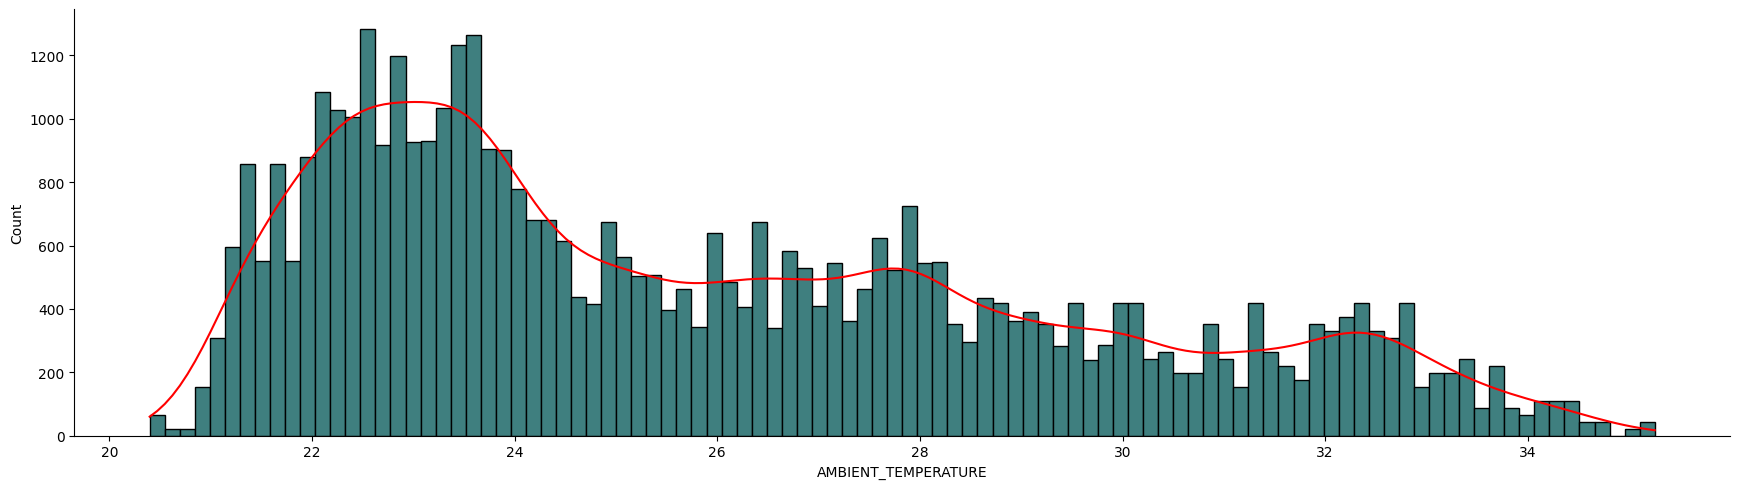

In [35]:
sns.displot(data=df_solar_plant1, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

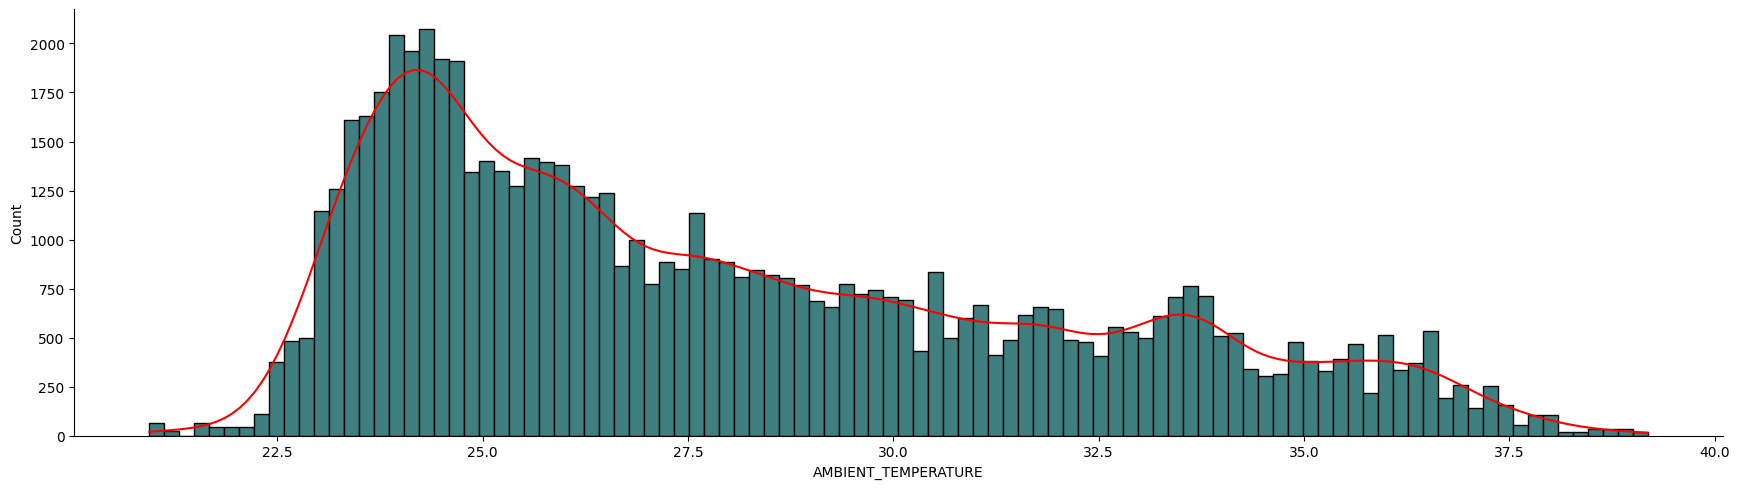

In [36]:
sns.displot(data=df_solar_plant2, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [37]:
df_solar_plant1['DATE'].nunique()

23

In [38]:
df_solar_plant2['DATE'].nunique()

34

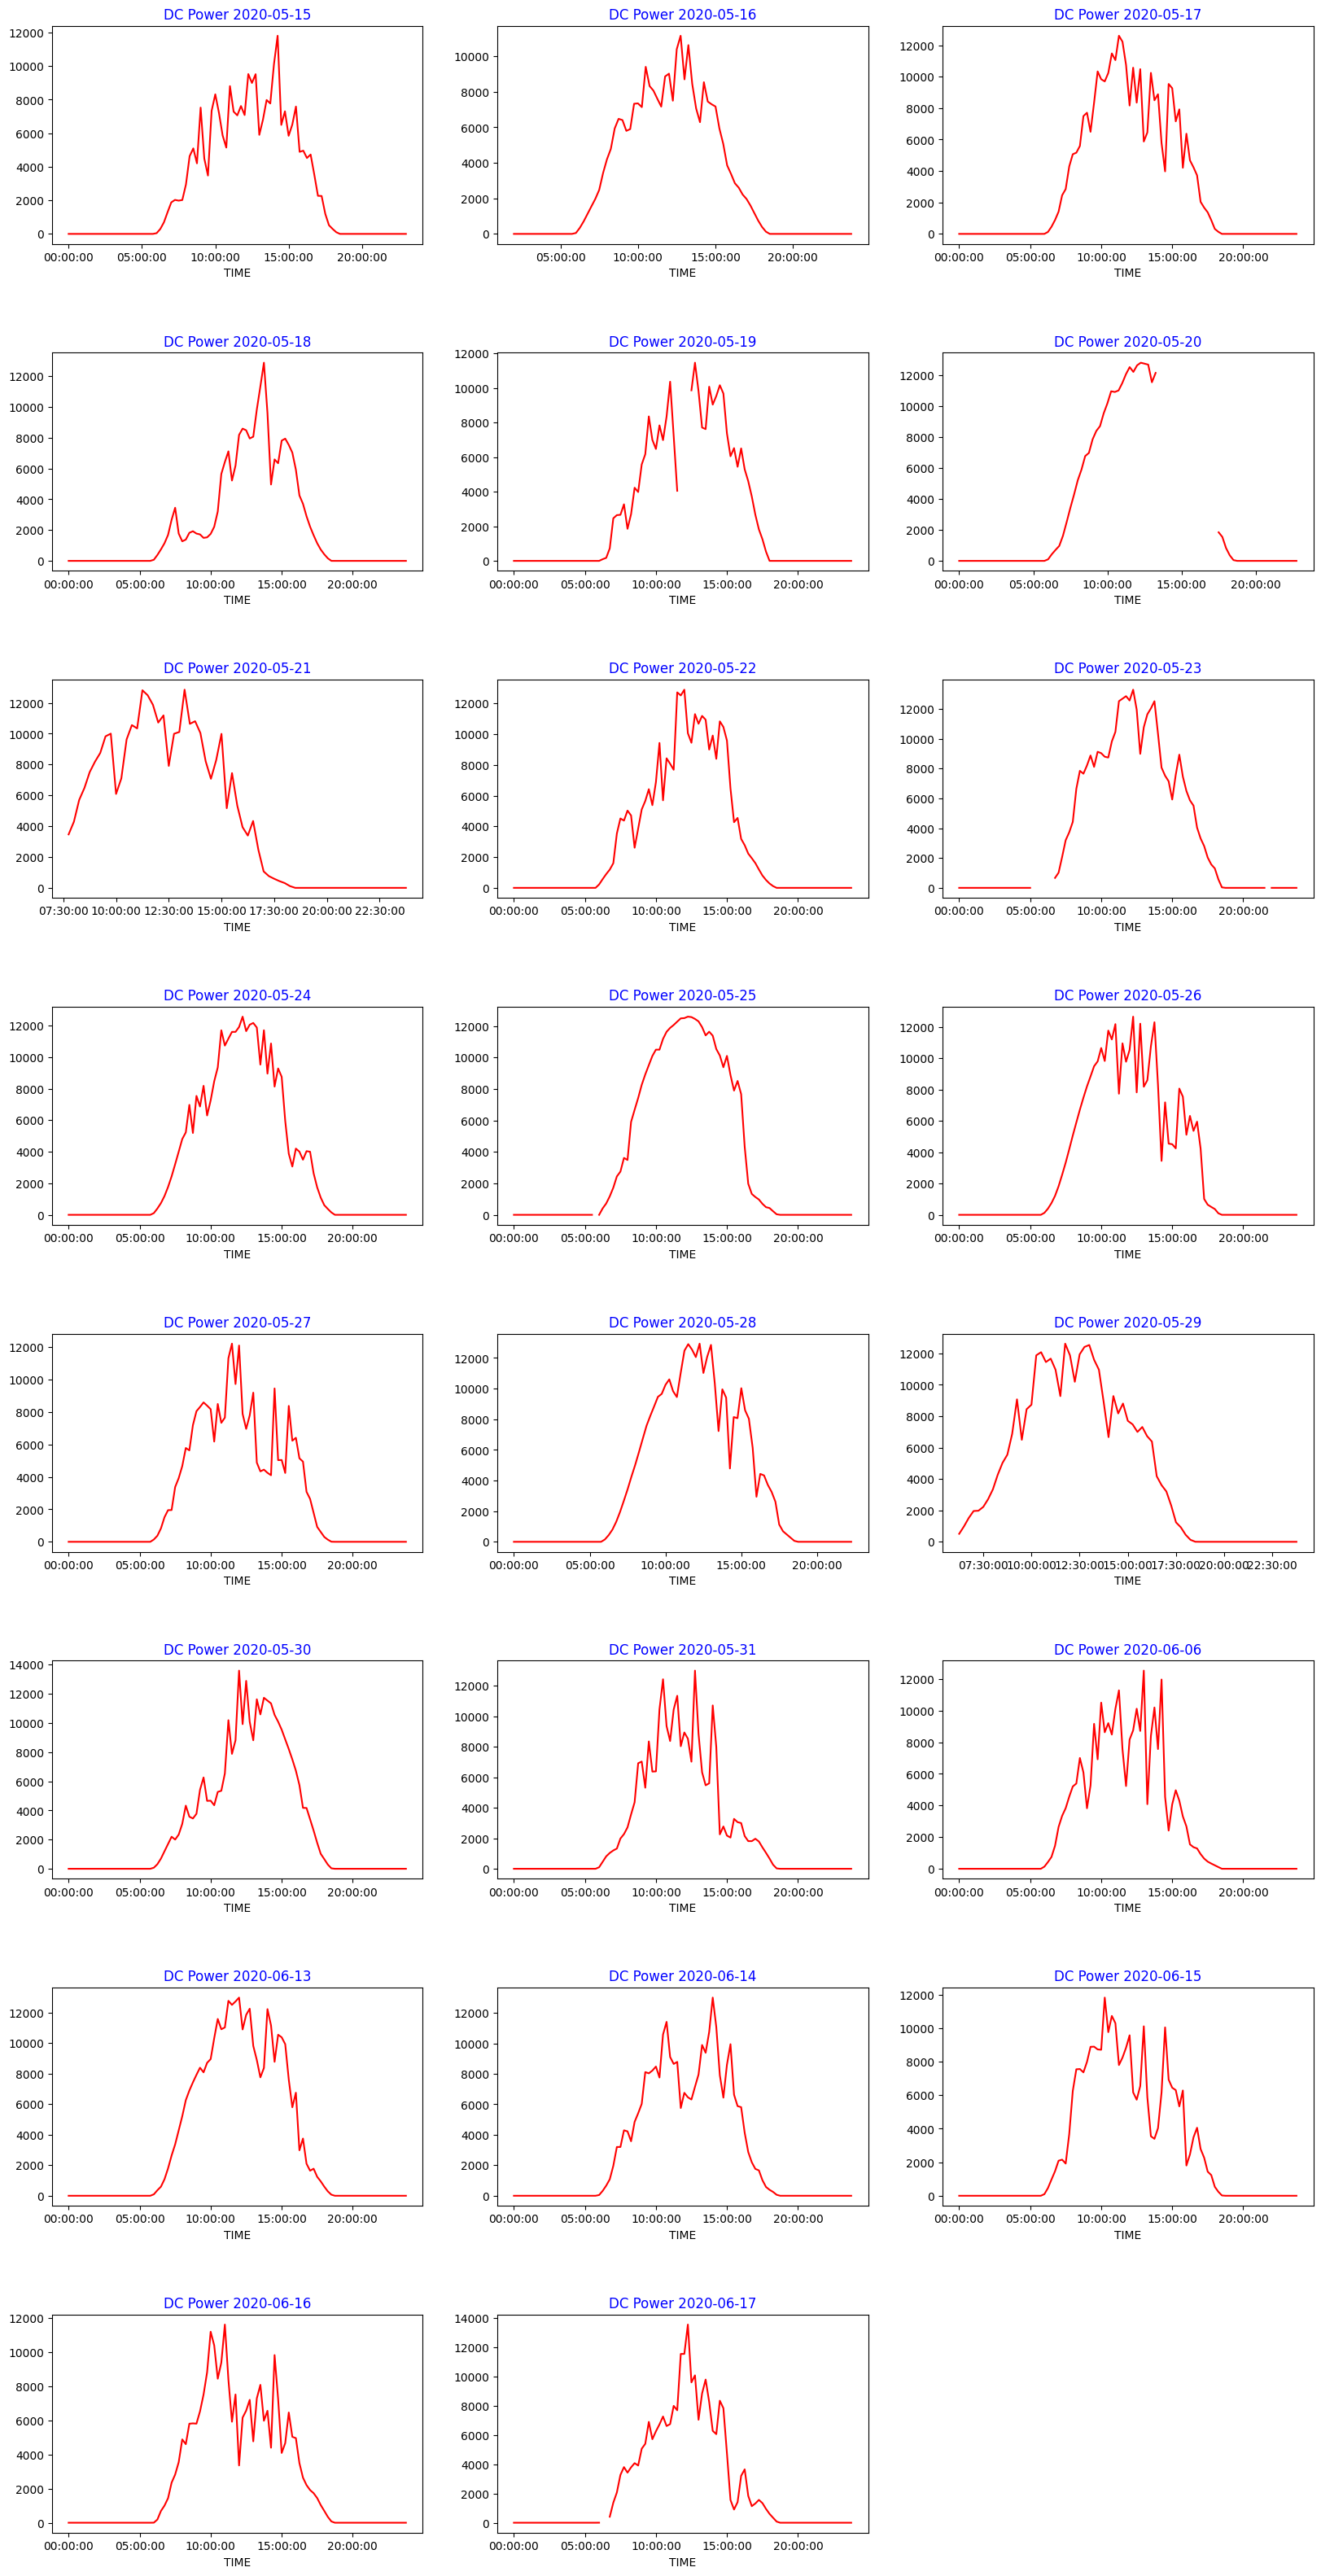

In [39]:
solar_dc1 = df_solar_plant1.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc1, row=8, col=3)

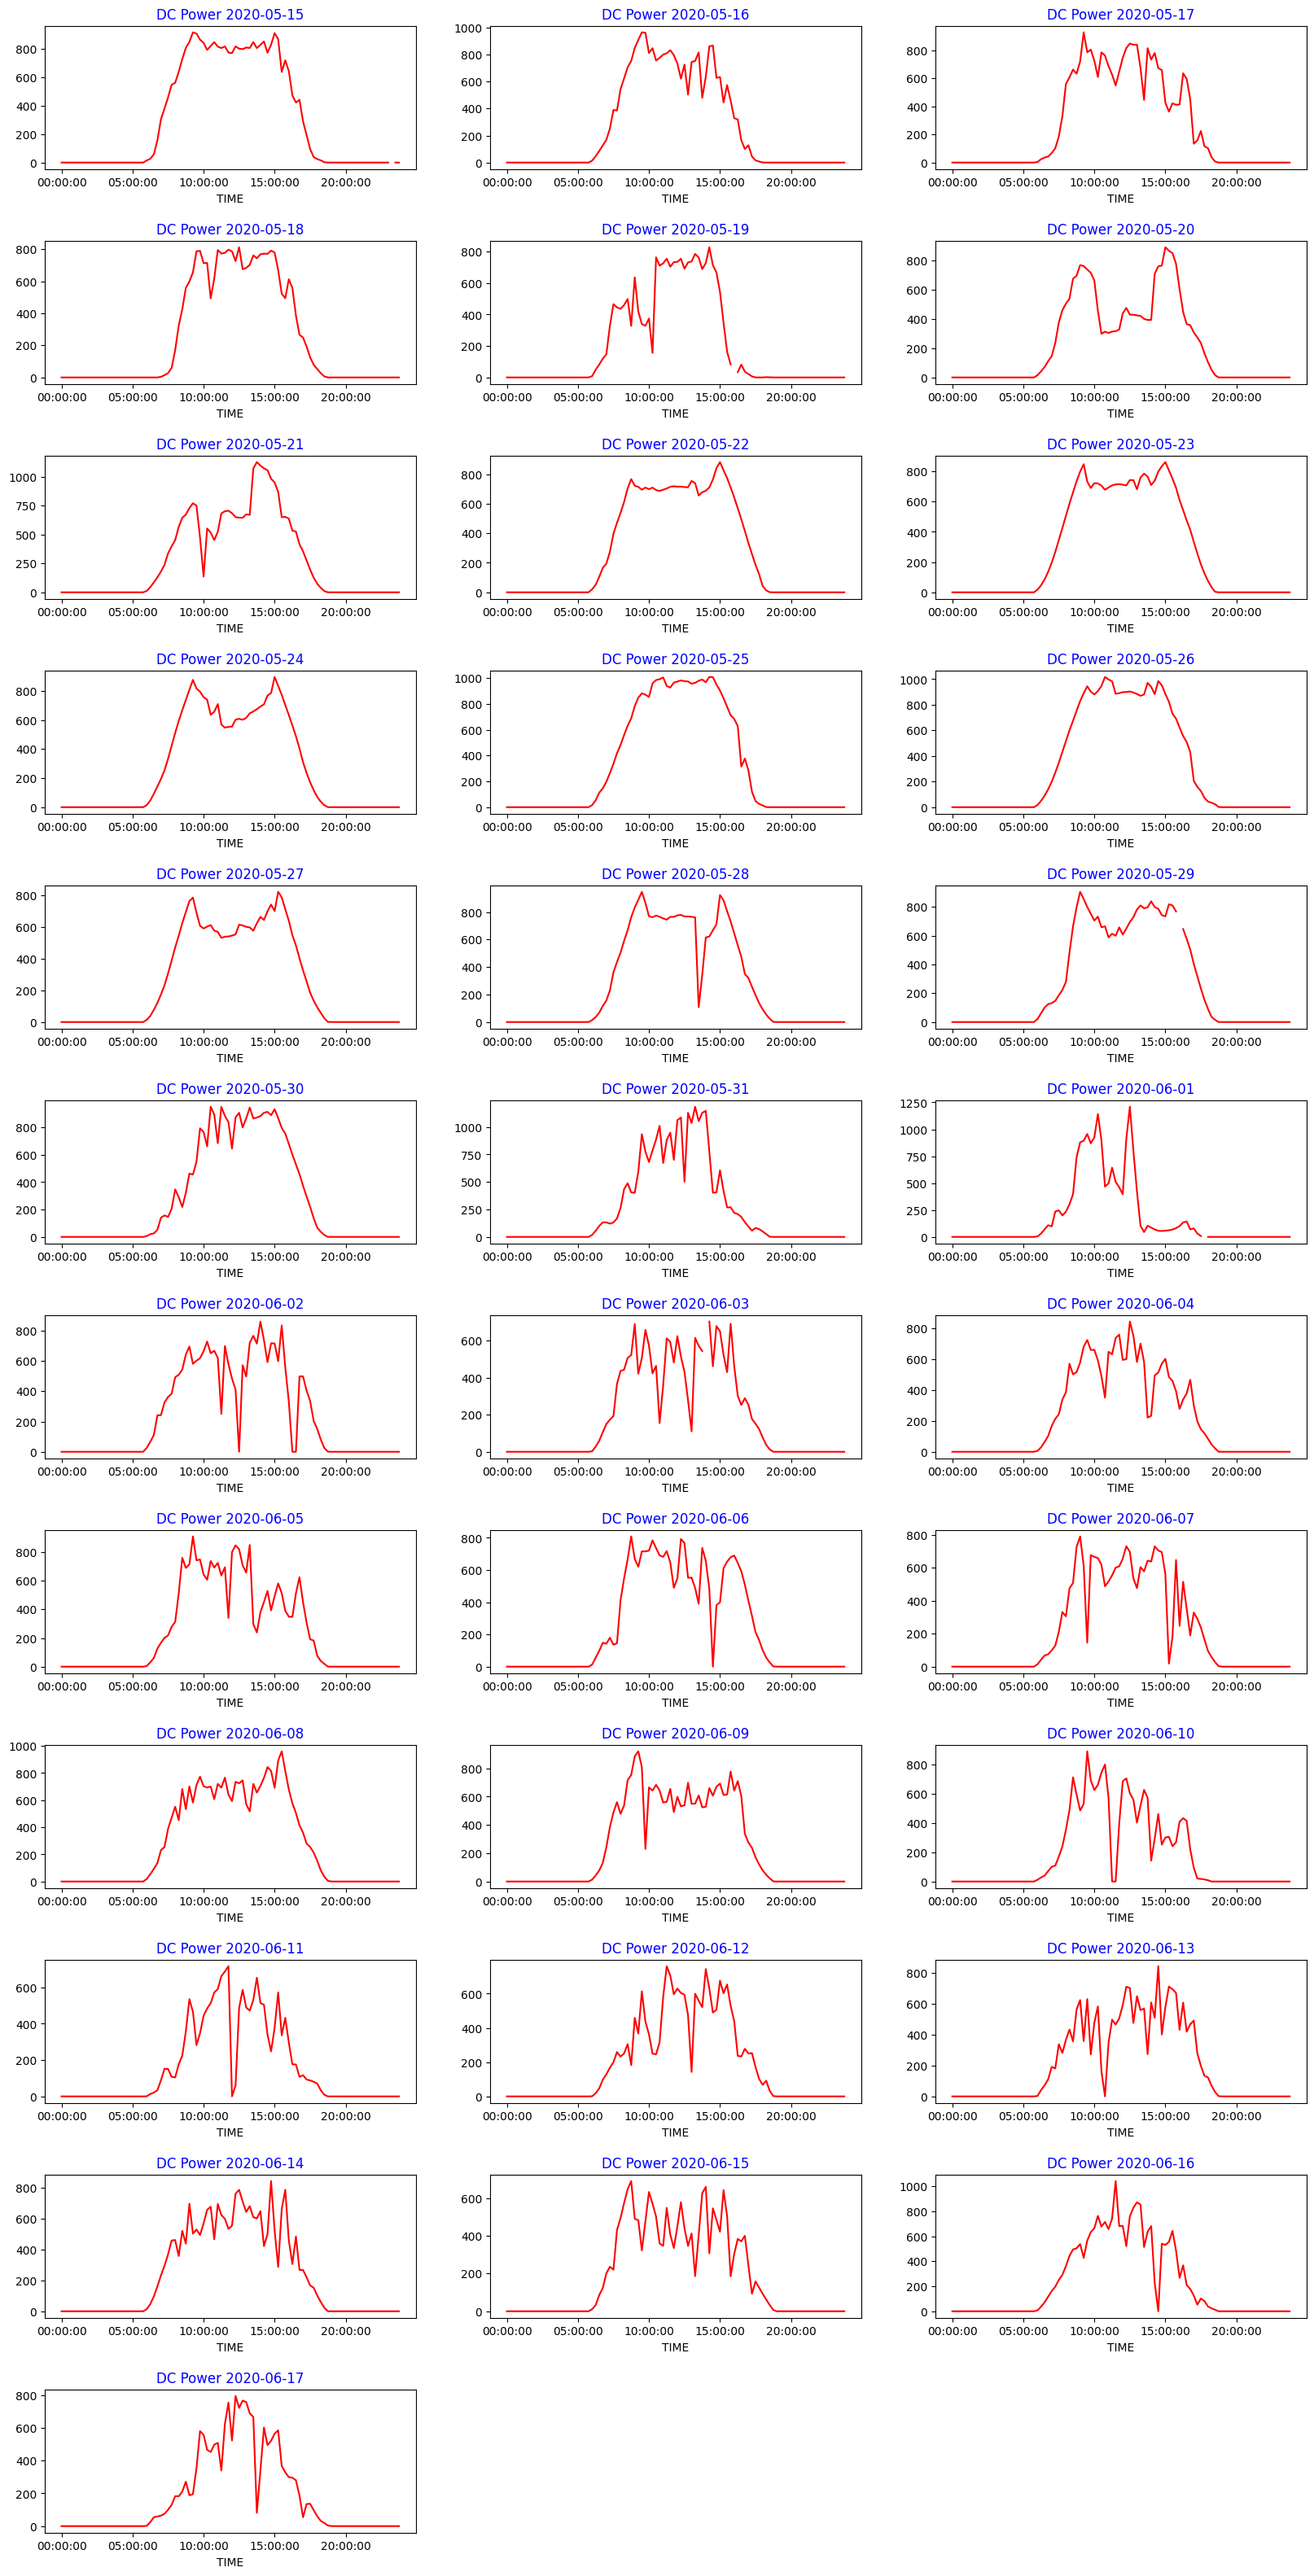

In [40]:
solar_dc2 = df_solar_plant2.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc2, row=12, col=3)

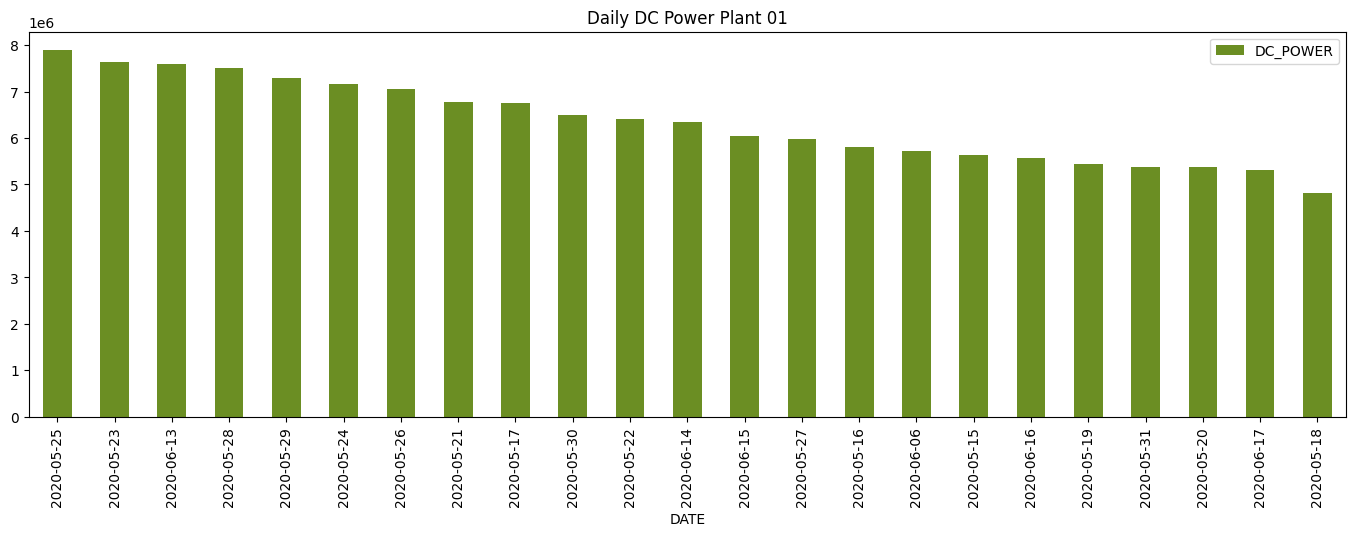

In [41]:
daily_dc_plant1 = df_solar_plant1.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc_plant1.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='OliveDrab')
plt.title('Daily DC Power Plant 01')
plt.show()

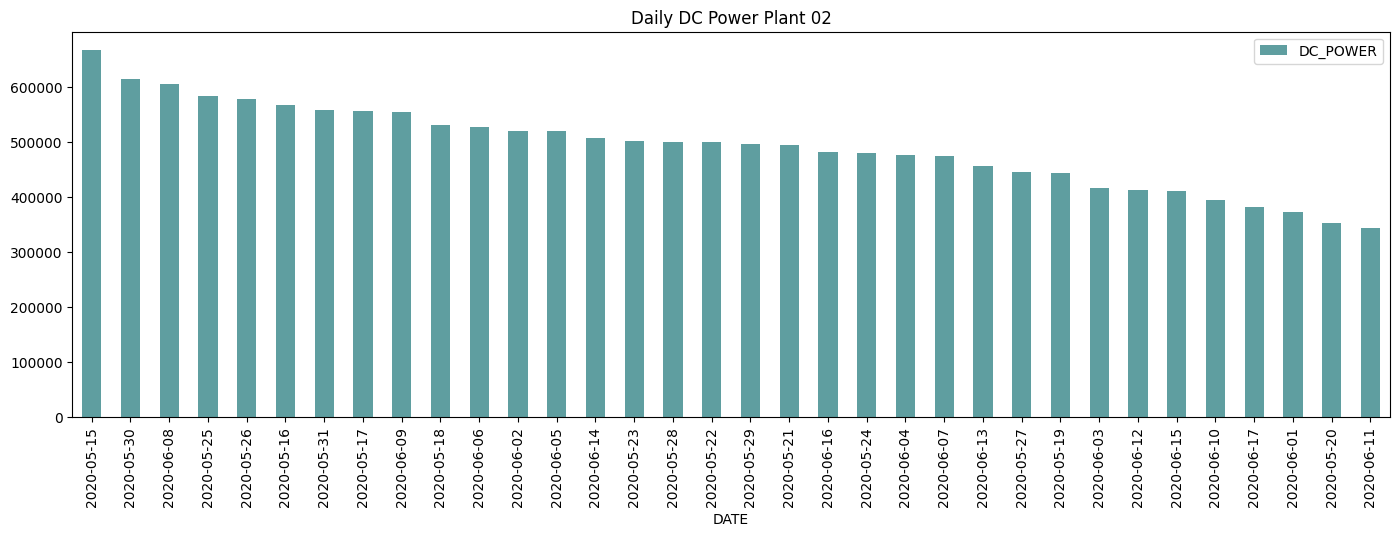

In [42]:
daily_dc_plant2 = df_solar_plant2.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc_plant2.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='cadetblue')
plt.title('Daily DC Power Plant 02')
plt.show()

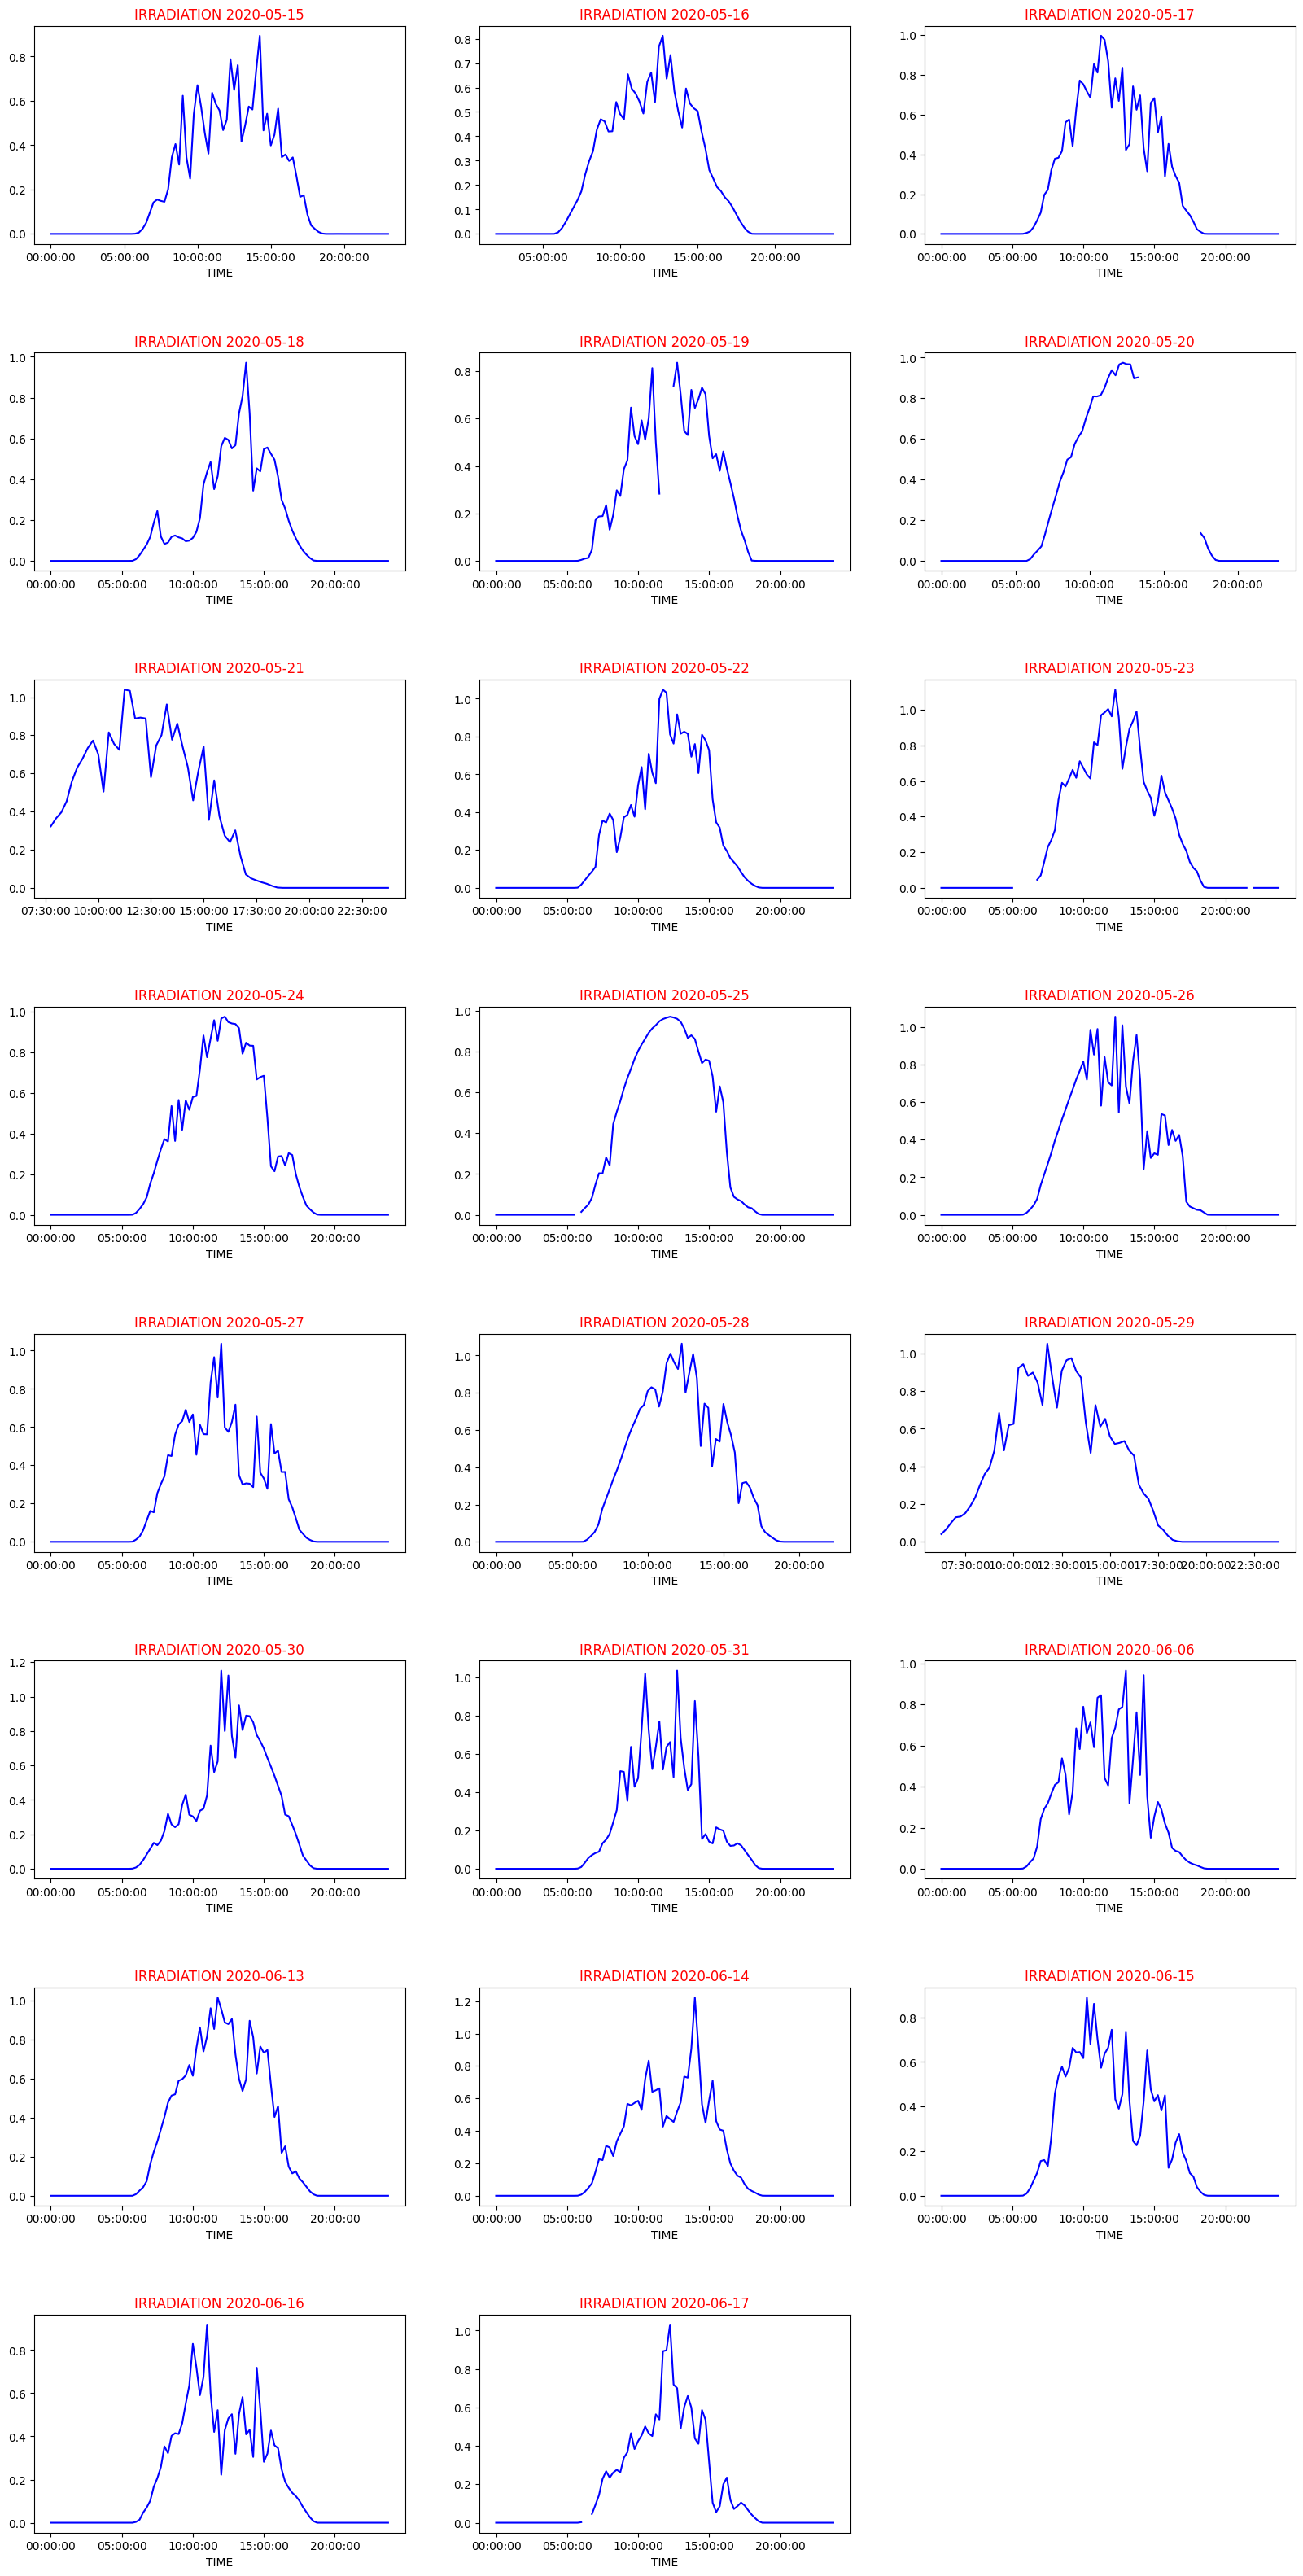

In [43]:
solar_irradiation_plant1 = df_solar_plant1.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_irradiation_plant1, row=8, col=3)

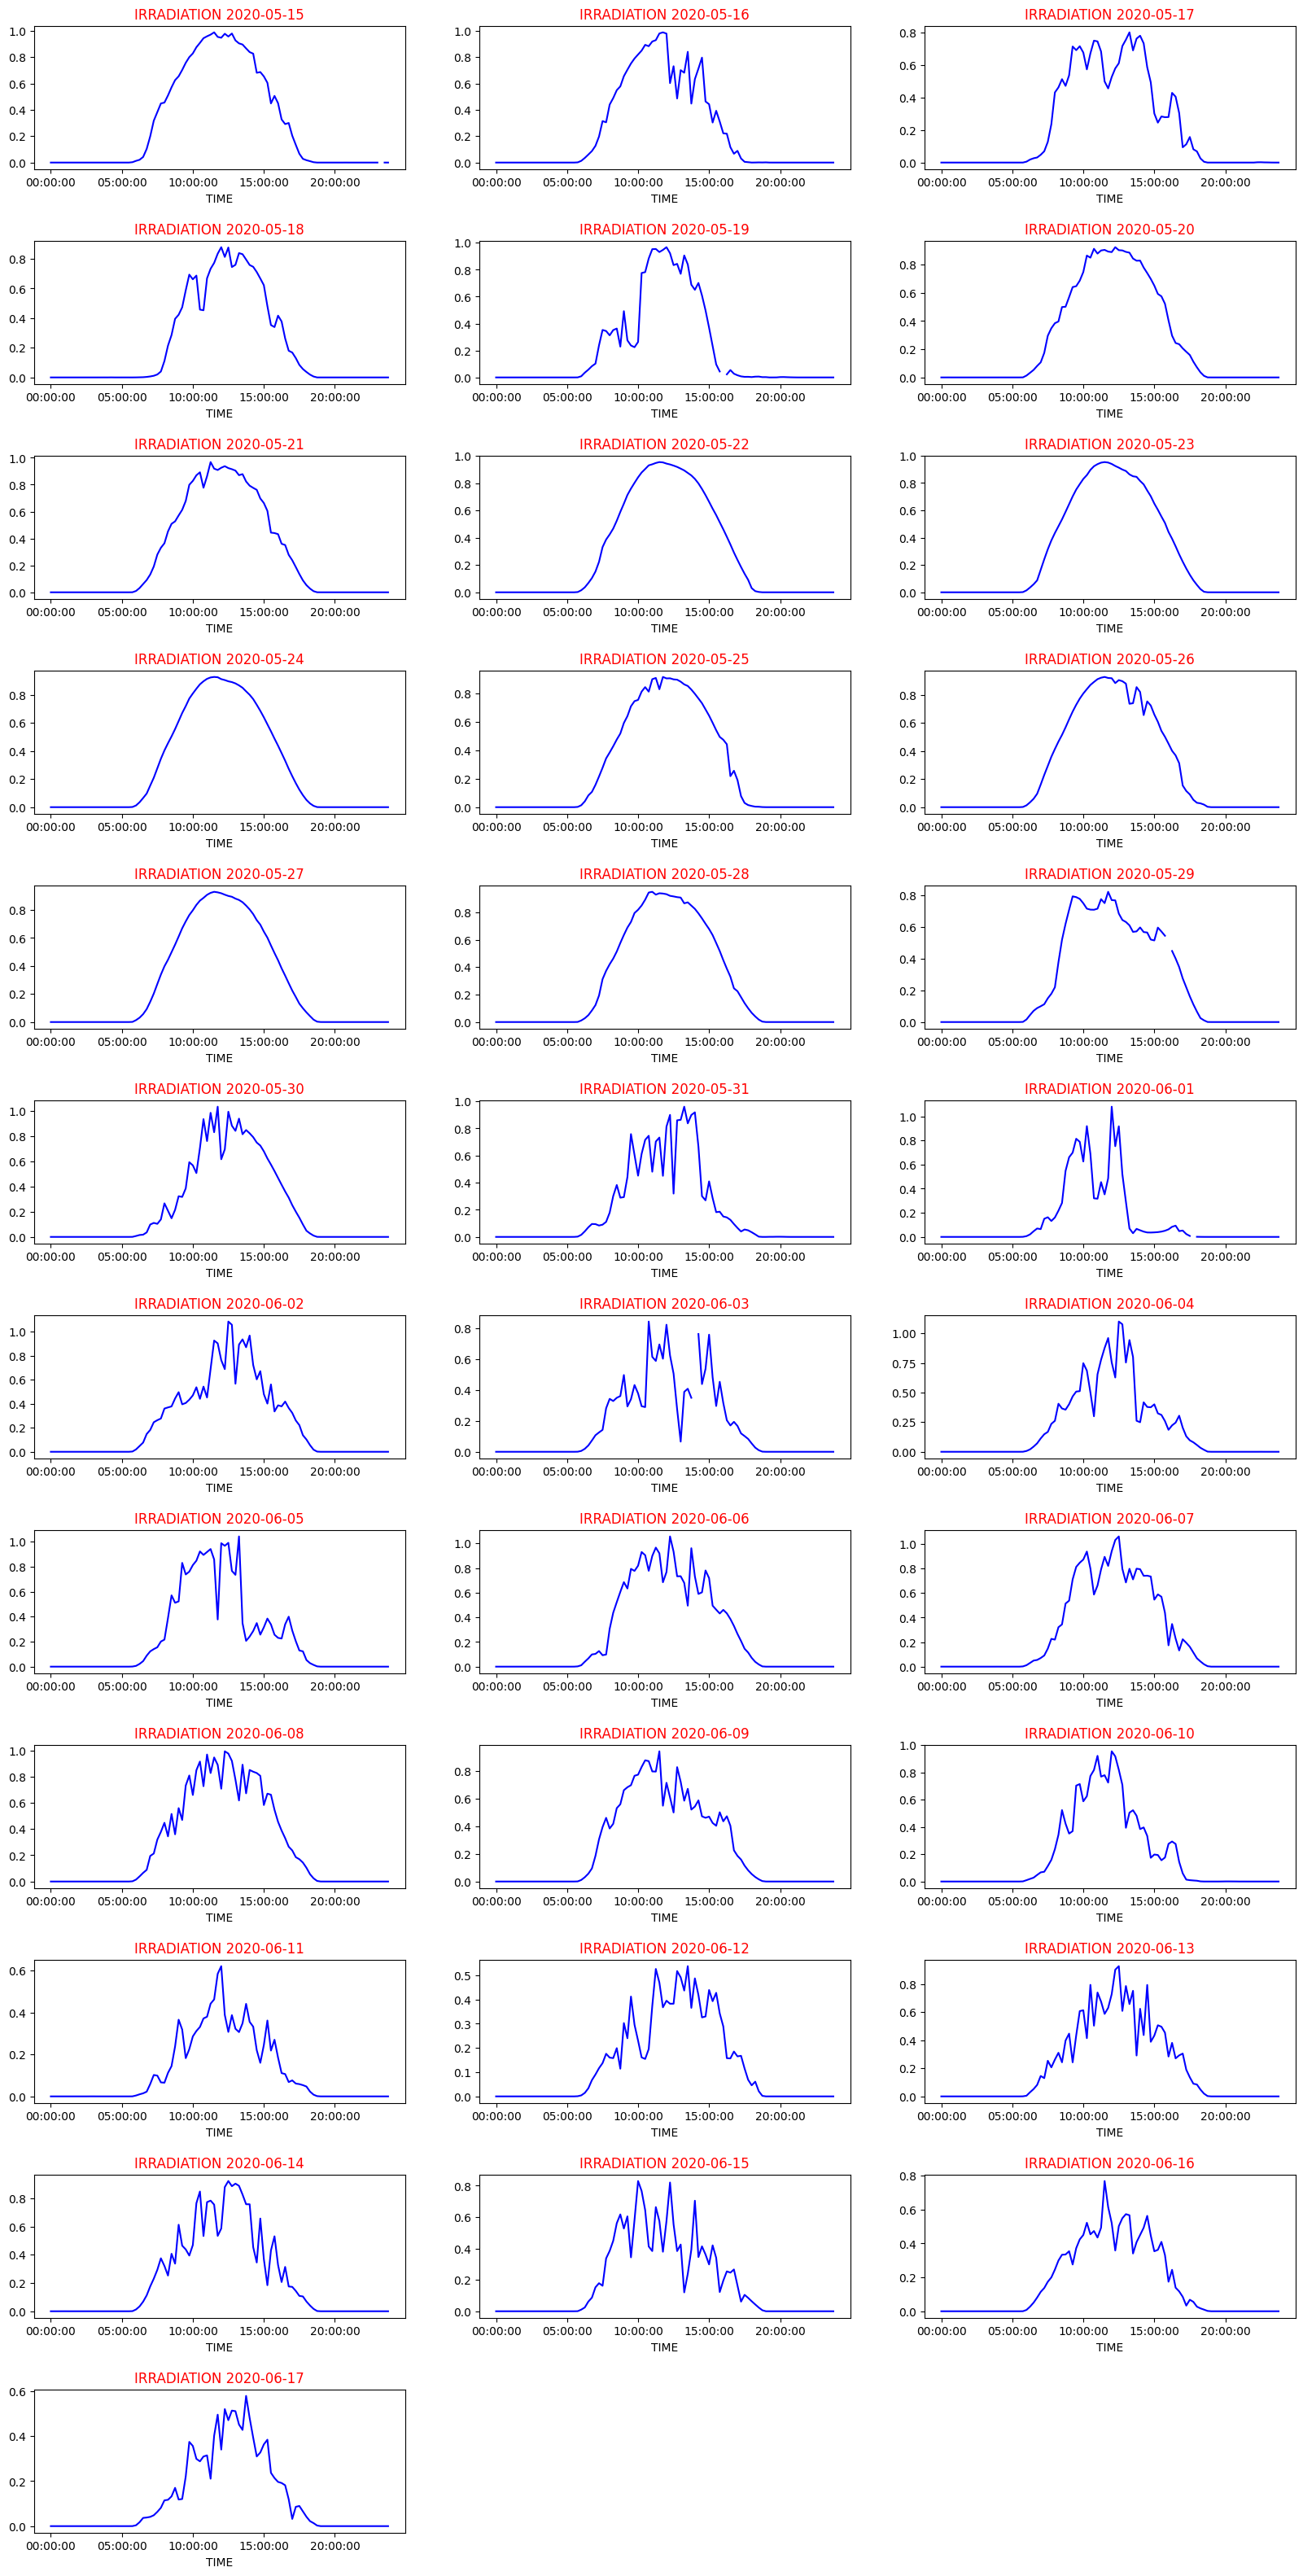

In [44]:
solar_irradiation_plant2 = df_solar_plant2.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_irradiation_plant2, row=12, col=3)

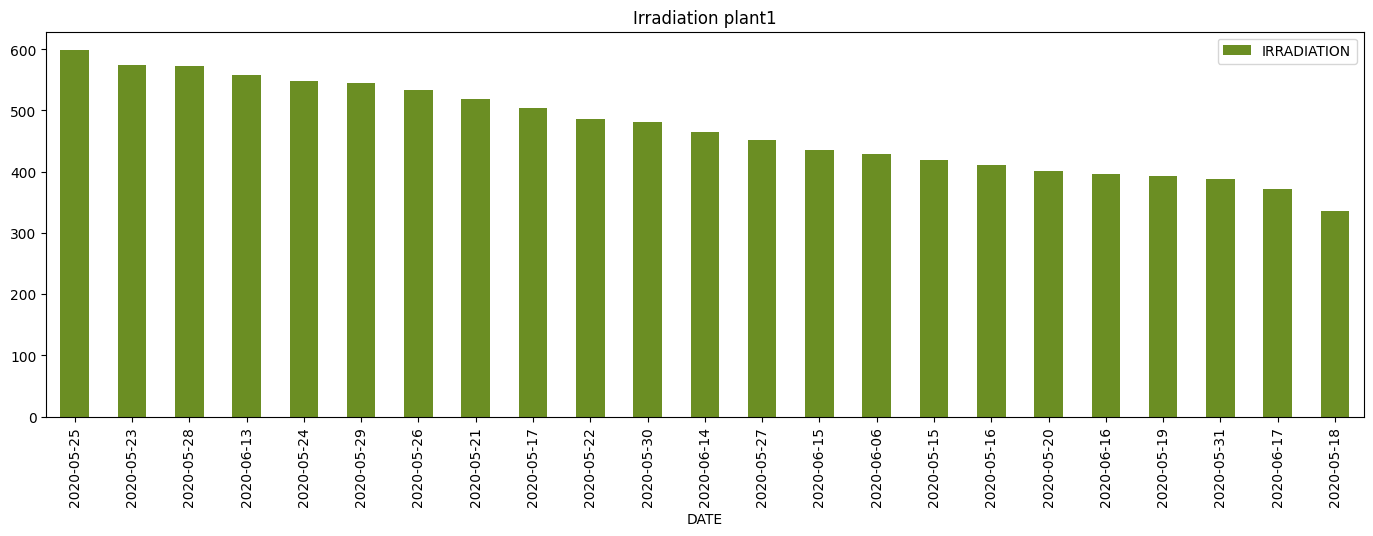

In [45]:
daily_irradiation_plant1 = df_solar_plant1.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation_plant1.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='OliveDrab')
plt.title('Irradiation plant1')
plt.show()

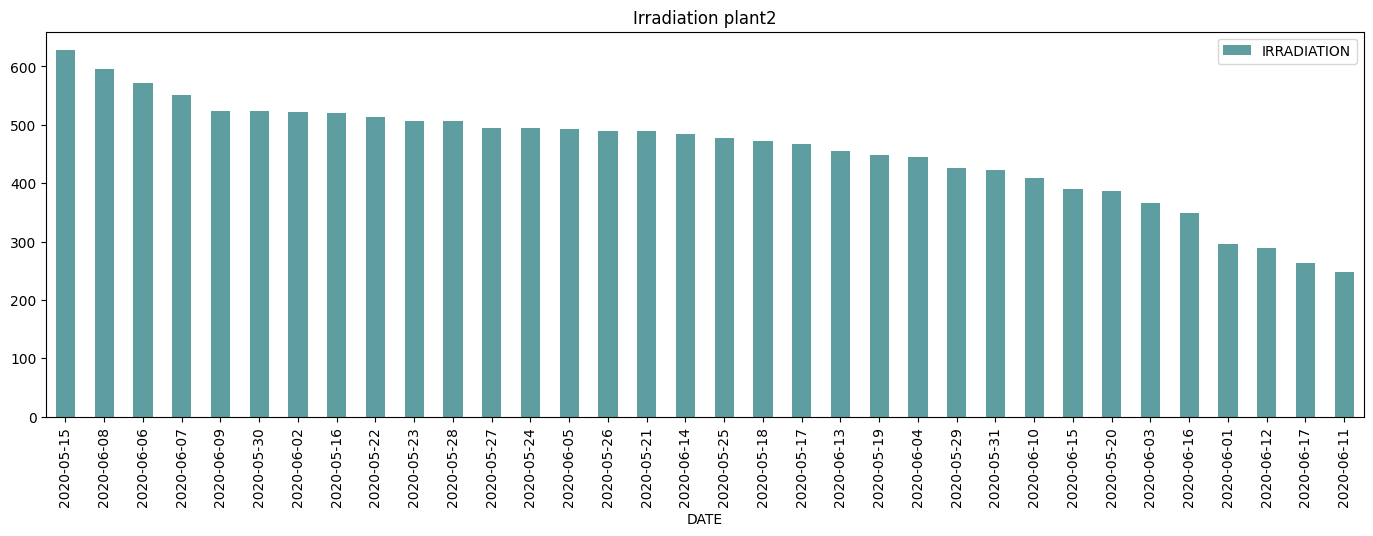

In [46]:
daily_irradiation_plant2 = df_solar_plant2.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation_plant2.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='cadetblue')
plt.title('Irradiation plant2')
plt.show()

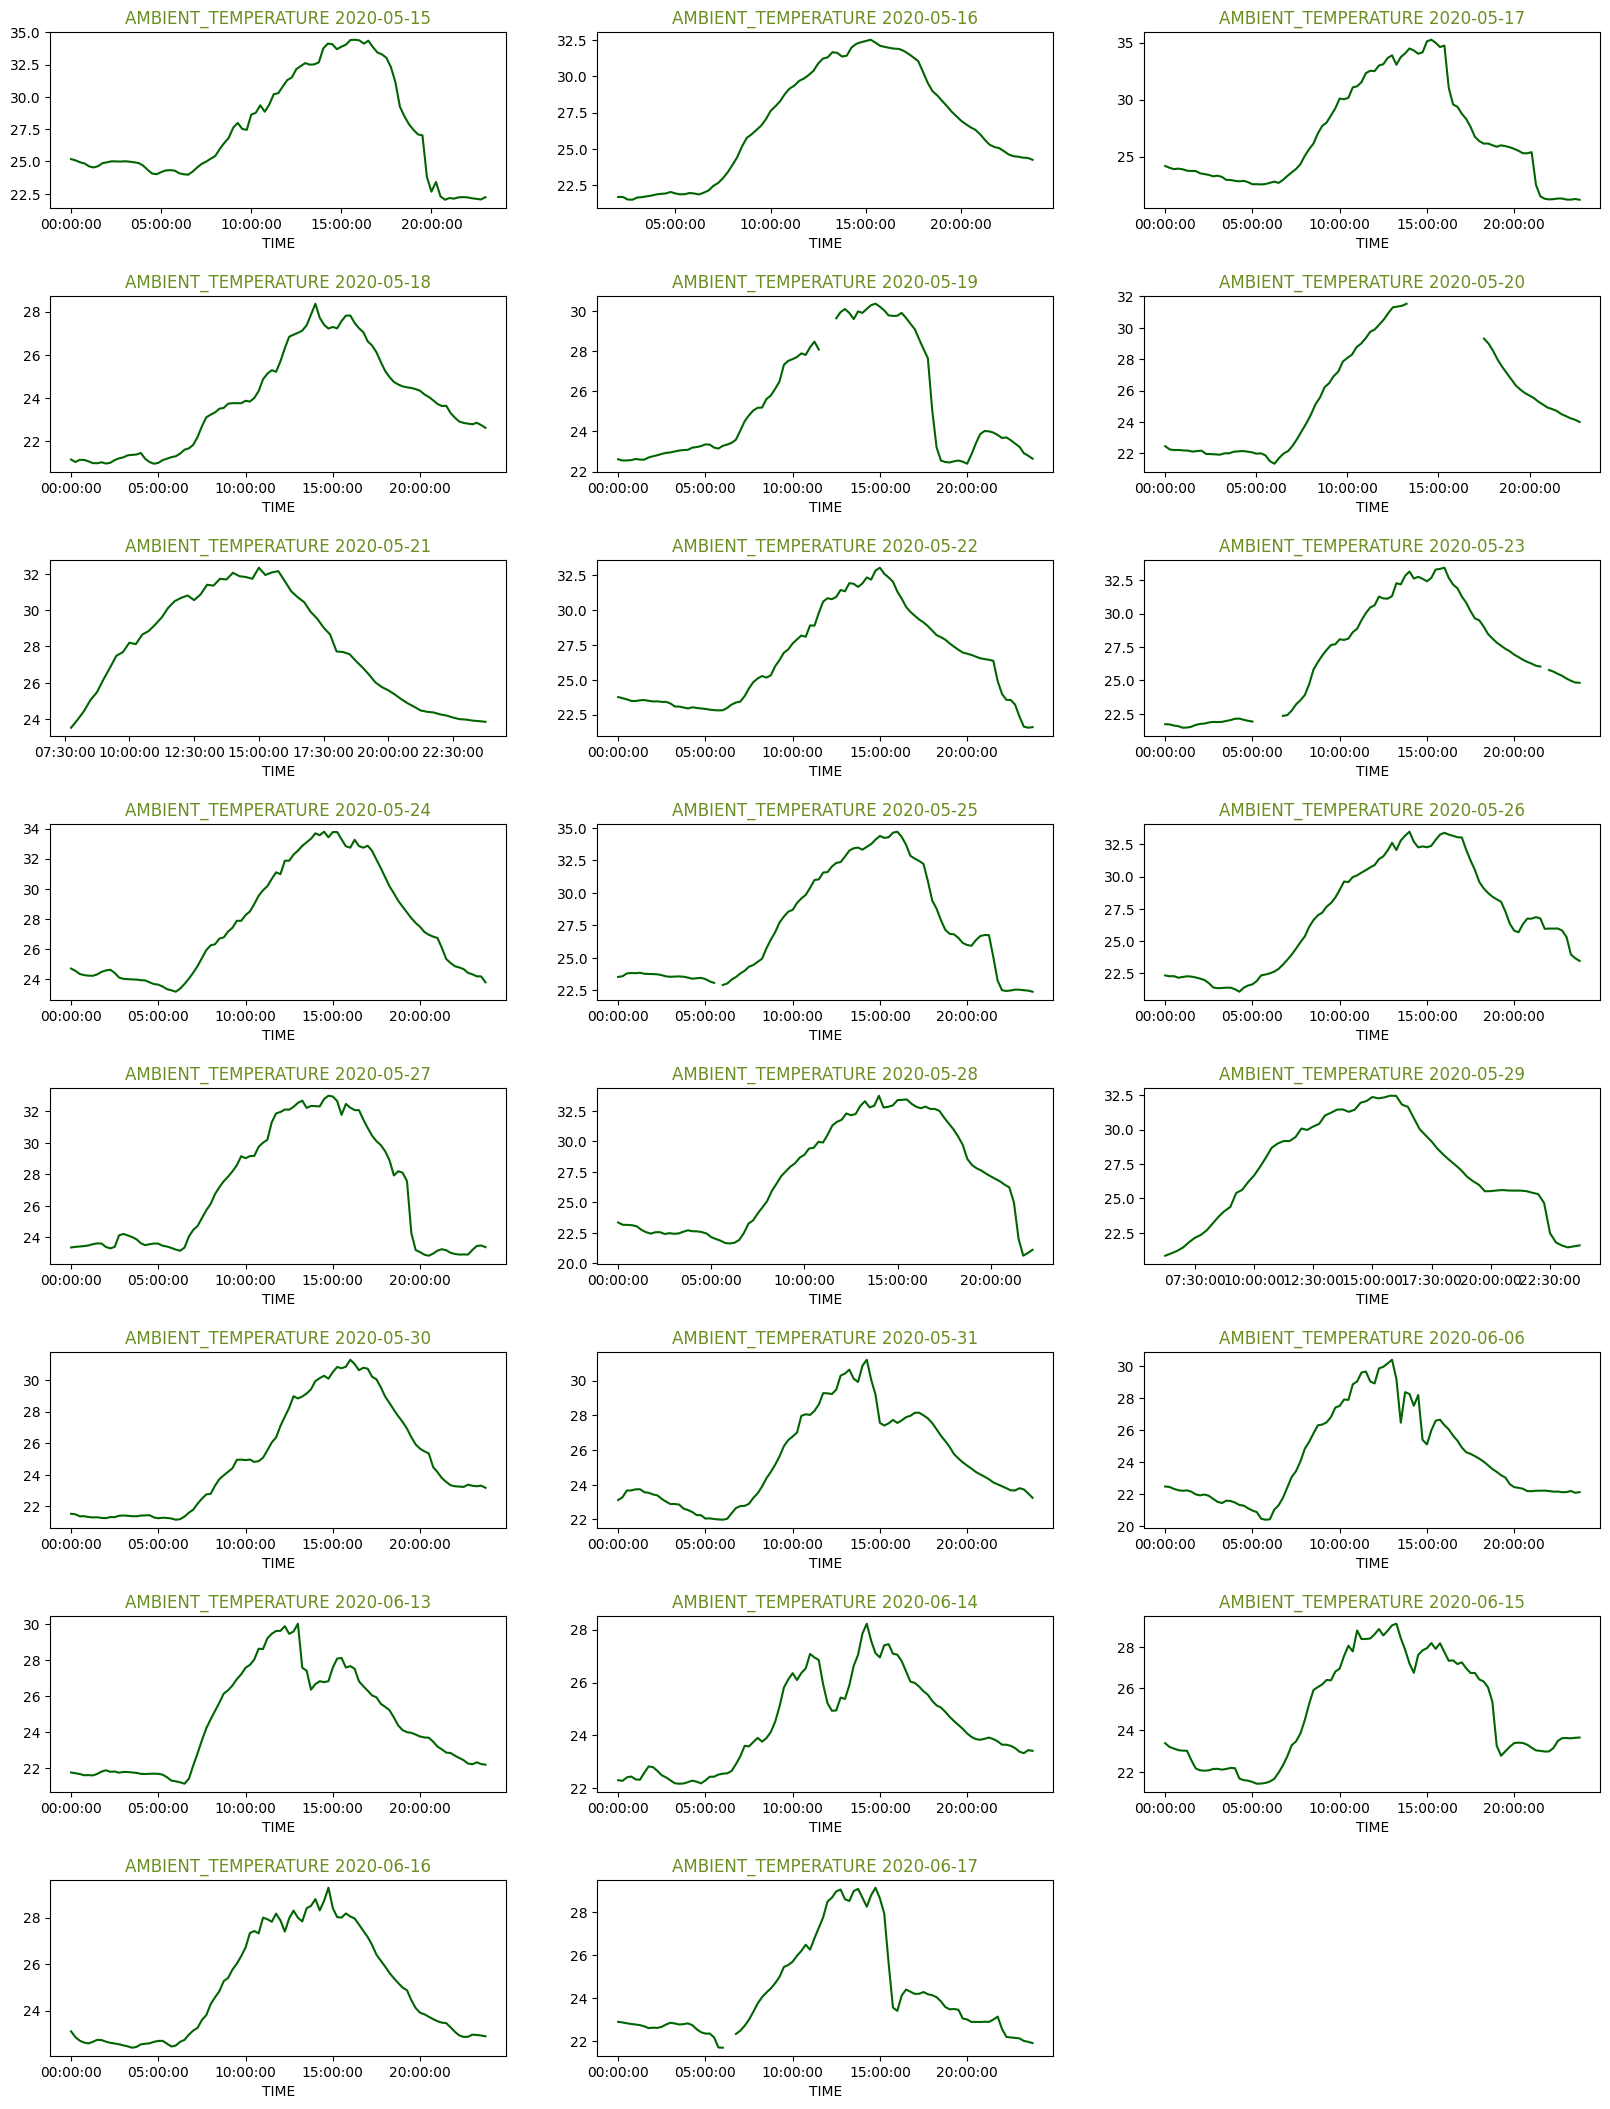

In [47]:
solar_ambiant_temp_1 = df_solar_plant1.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='OliveDrab')
        
Daywise_plot(data=solar_ambiant_temp_1, row=12, col=3)

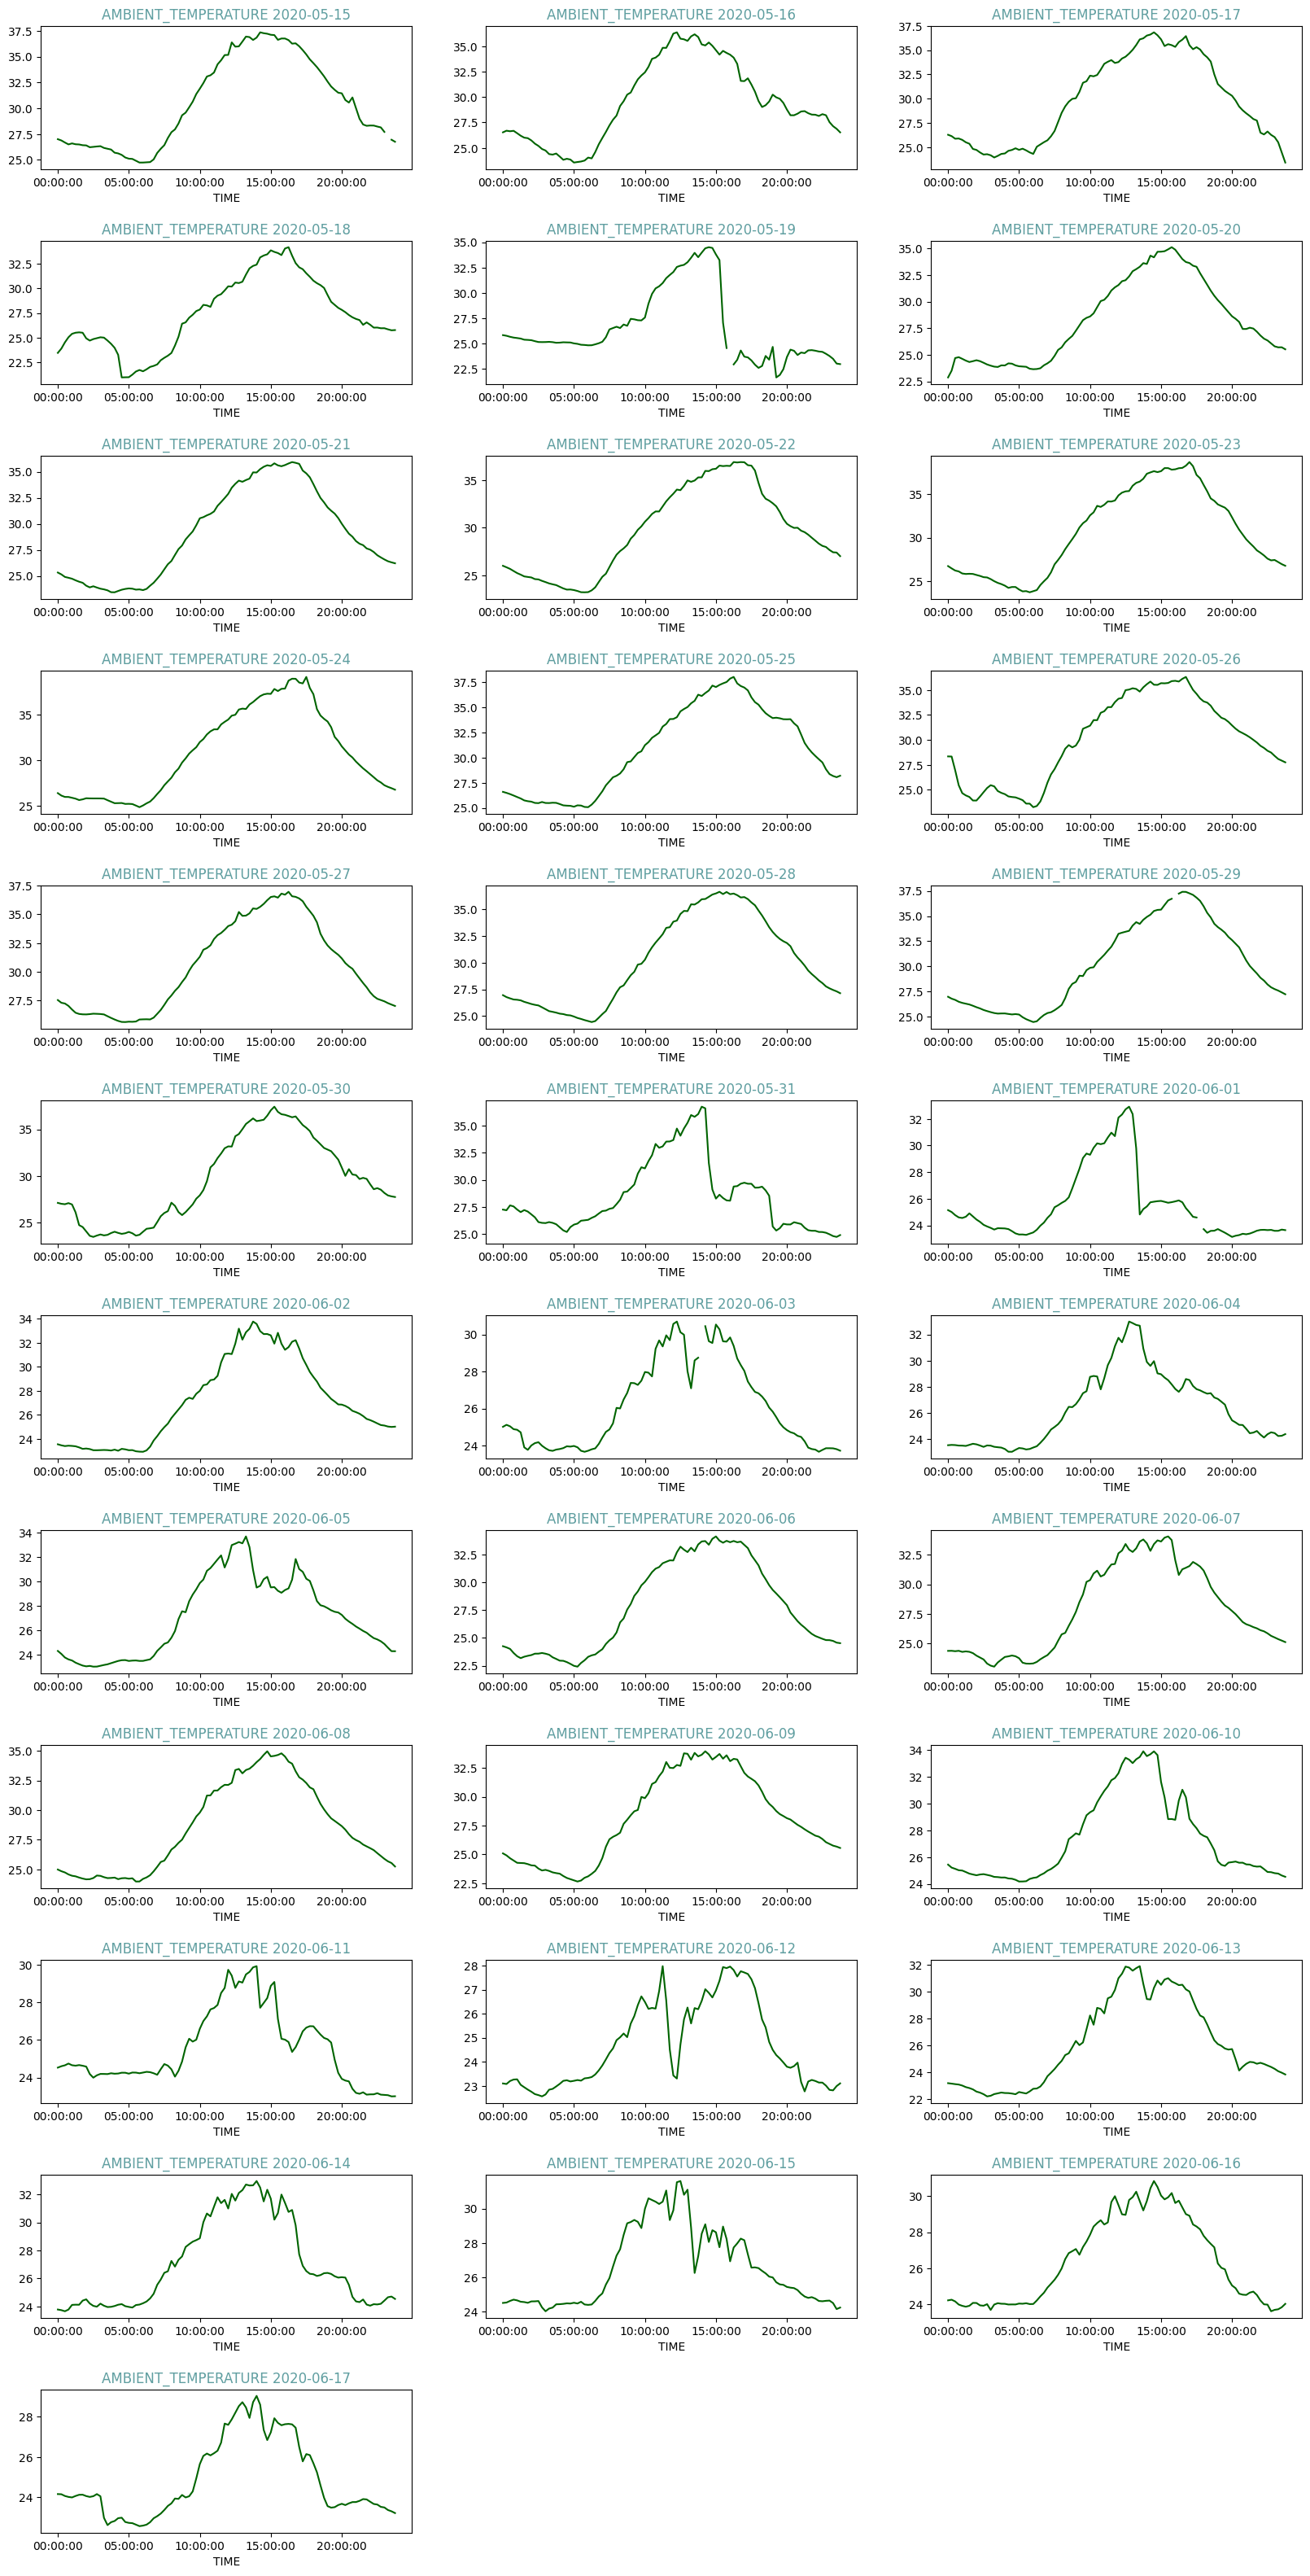

In [48]:
solar_ambiant_temp_2 = df_solar_plant2.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='cadetblue')
        
Daywise_plot(data=solar_ambiant_temp_2, row=12, col=3)

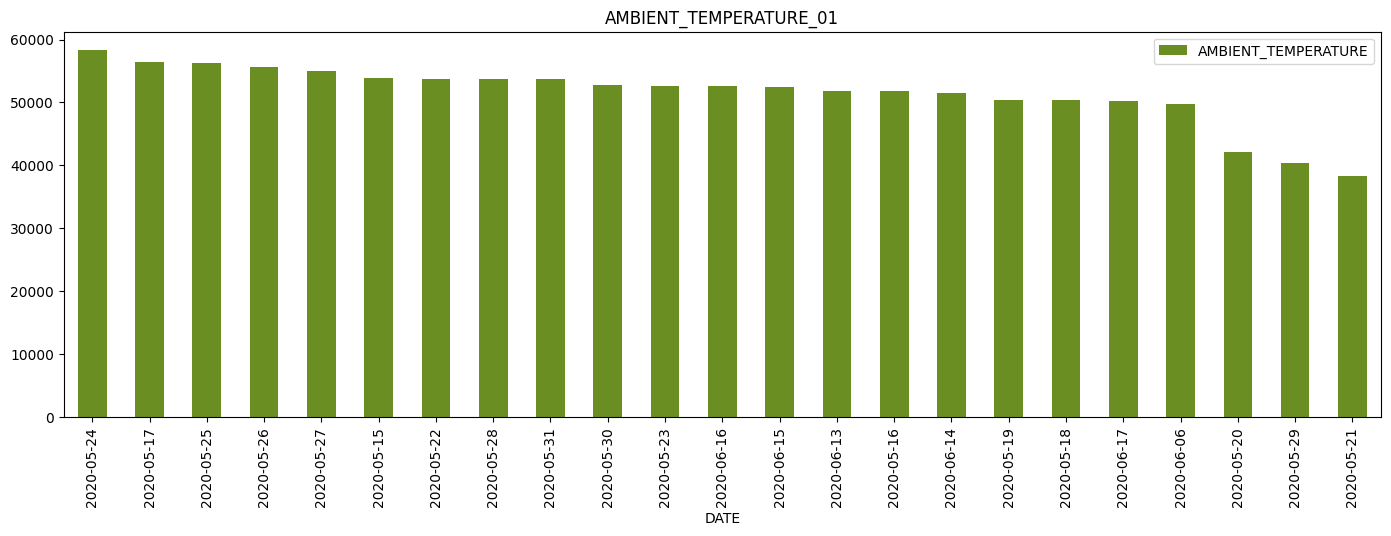

In [49]:
daily_ambient_temp_1 = df_solar_plant1.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp_1.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='OliveDrab')
plt.title('AMBIENT_TEMPERATURE_01')
plt.show()

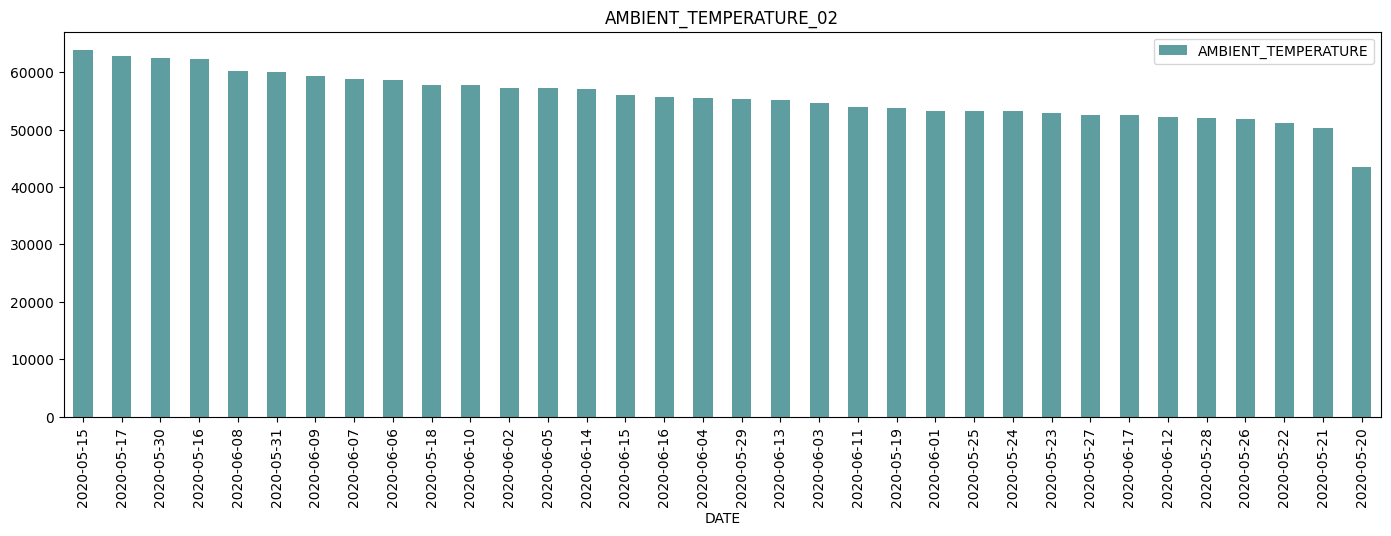

In [50]:
daily_ambient_temp_2 = df_solar_plant2.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp_2.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='cadetblue')
plt.title('AMBIENT_TEMPERATURE_02')
plt.show()

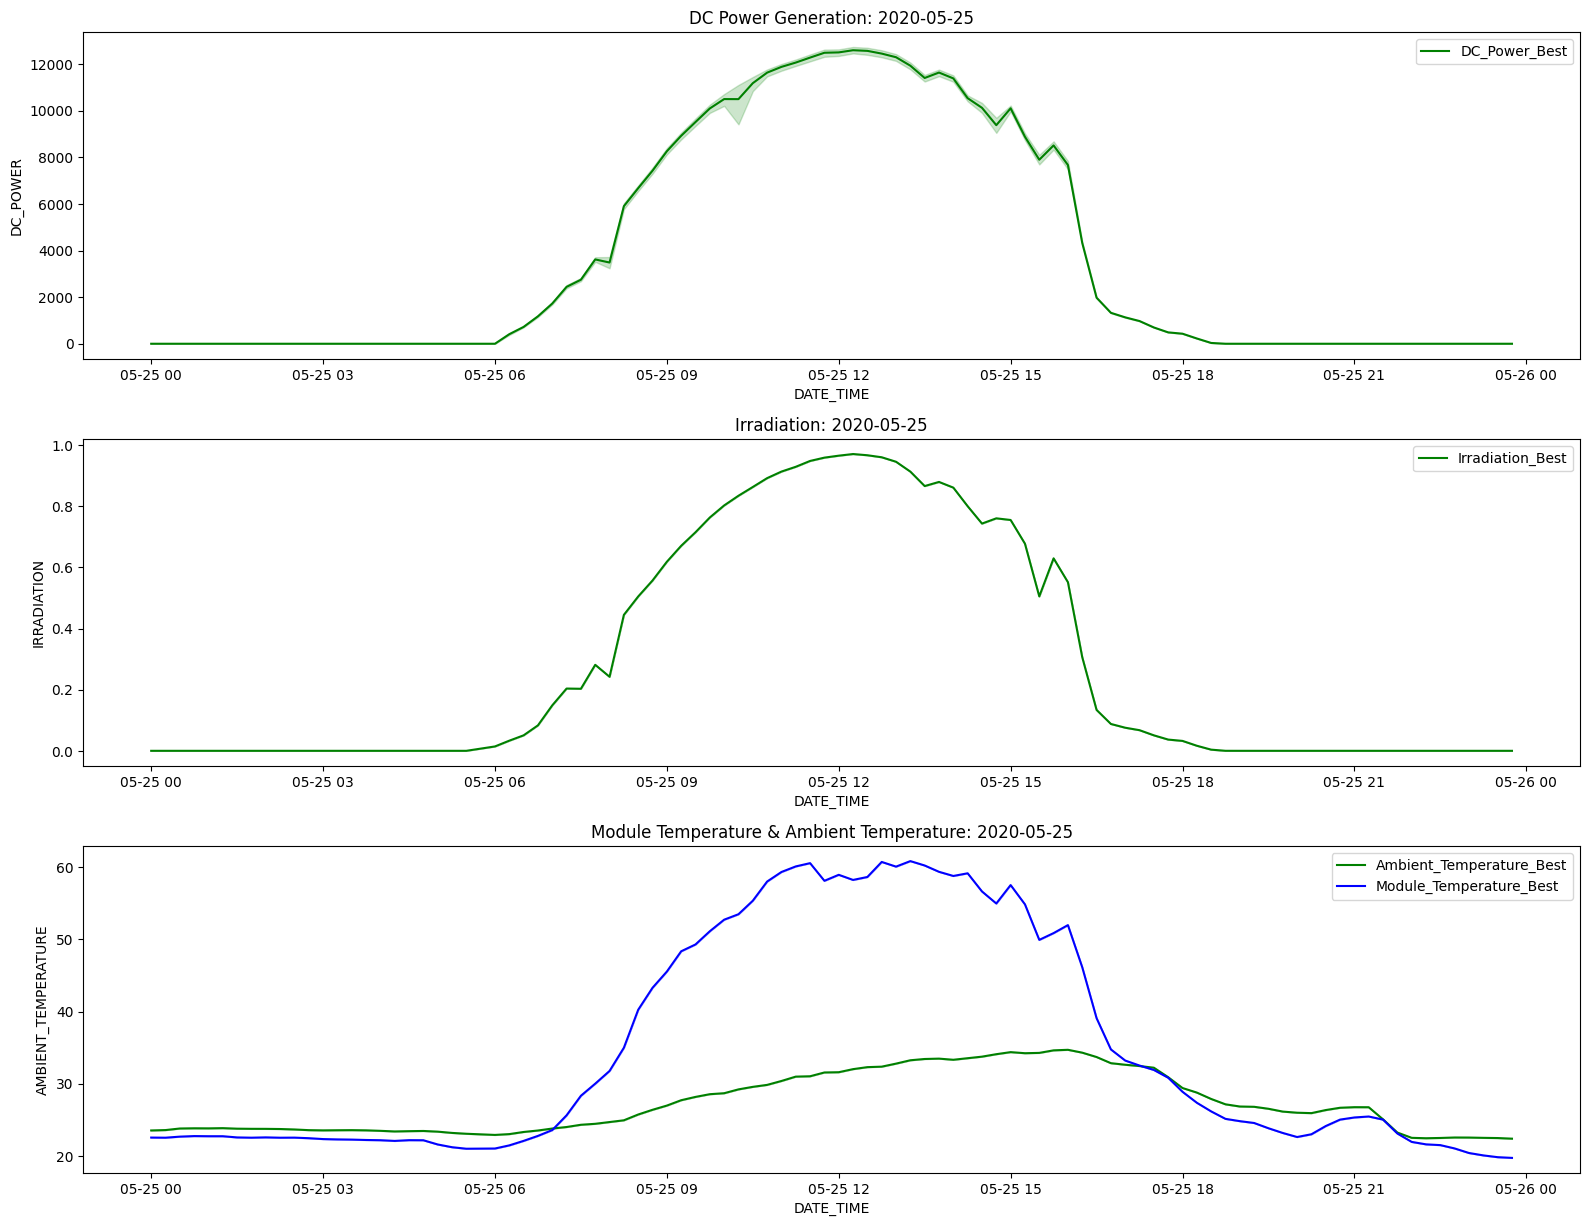

In [52]:
plt.figure(figsize=(16,16))

date = "2020-05-25"

plt.subplot(411)
sns.lineplot(x="DATE_TIME", y="DC_POWER", data=df_solar_plant1[df_solar_plant1["DATE_STRING"] == date], label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date))

plt.subplot(412)
sns.lineplot(x="DATE_TIME", y="IRRADIATION", data=df_solar_plant1[df_solar_plant1["DATE_STRING"] == date], label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date))

plt.subplot(413)
sns.lineplot(x="DATE_TIME", y="AMBIENT_TEMPERATURE", data=df_solar_plant1[df_solar_plant1["DATE_STRING"] == date], label="Ambient_Temperature_Best", color='green')
sns.lineplot(x="DATE_TIME", y="MODULE_TEMPERATURE", data=df_solar_plant1[df_solar_plant1["DATE_STRING"] == date], label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date))

plt.tight_layout()
plt.show()

TypeError: ignored

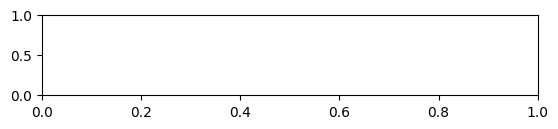

In [54]:
plt.subplot(411)
sns.lineplot(data=df_solar_plant1[df_solar_plant1["DATE_STRING"].isin(date)], x="DATE_TIME", y="DC_POWER", label="DC_Power_Best",color='green')
plt.title("DC Power Generation: {}".format(date[0]))


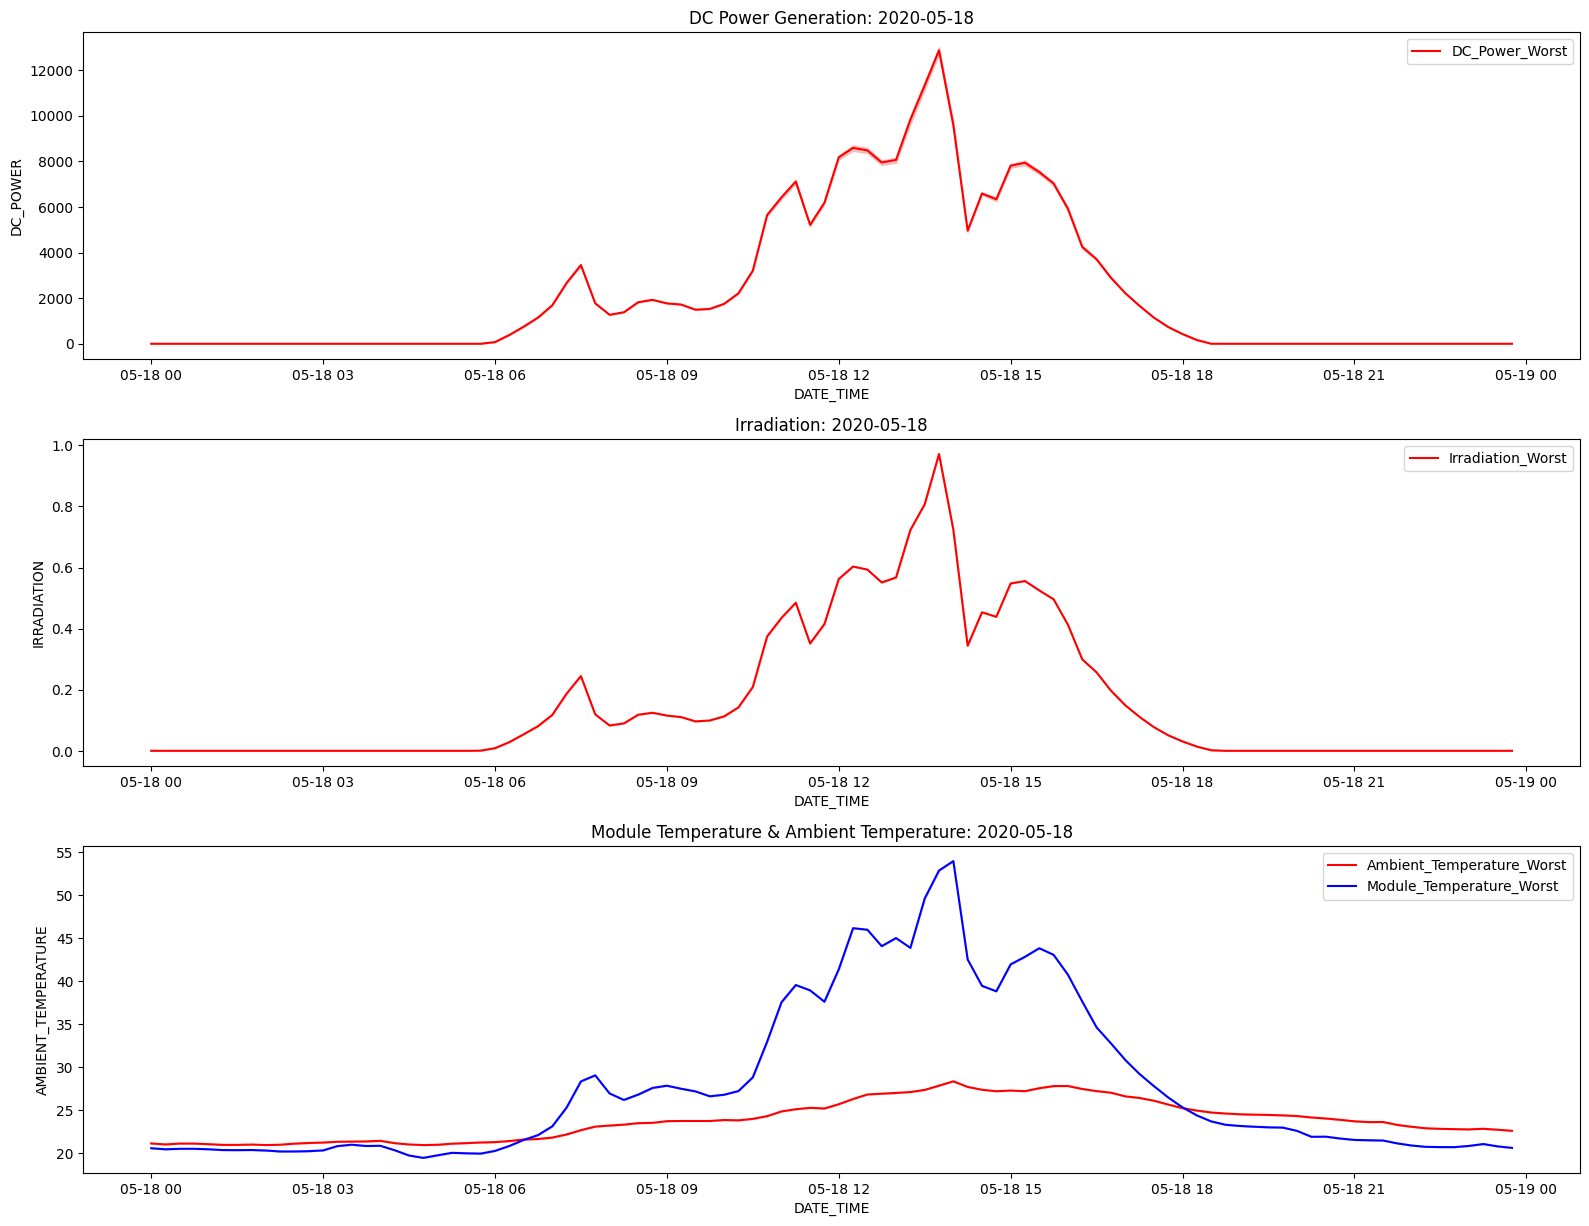

In [55]:
date = "2020-05-18"
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(x="DATE_TIME", y="DC_POWER", data=df_solar_plant1[df_solar_plant1["DATE_STRING"] == date], label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date))

plt.subplot(412)
sns.lineplot(x="DATE_TIME", y="IRRADIATION", data=df_solar_plant1[df_solar_plant1["DATE_STRING"] == date], label="Irradiation_Worst", color='red')
plt.title("Irradiation: {}".format(date))

plt.subplot(413)
sns.lineplot(x="DATE_TIME", y="AMBIENT_TEMPERATURE", data=df_solar_plant1[df_solar_plant1["DATE_STRING"] == date], label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x="DATE_TIME", y="MODULE_TEMPERATURE", data=df_solar_plant1[df_solar_plant1["DATE_STRING"] == date], label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date))

plt.tight_layout()
plt.show()



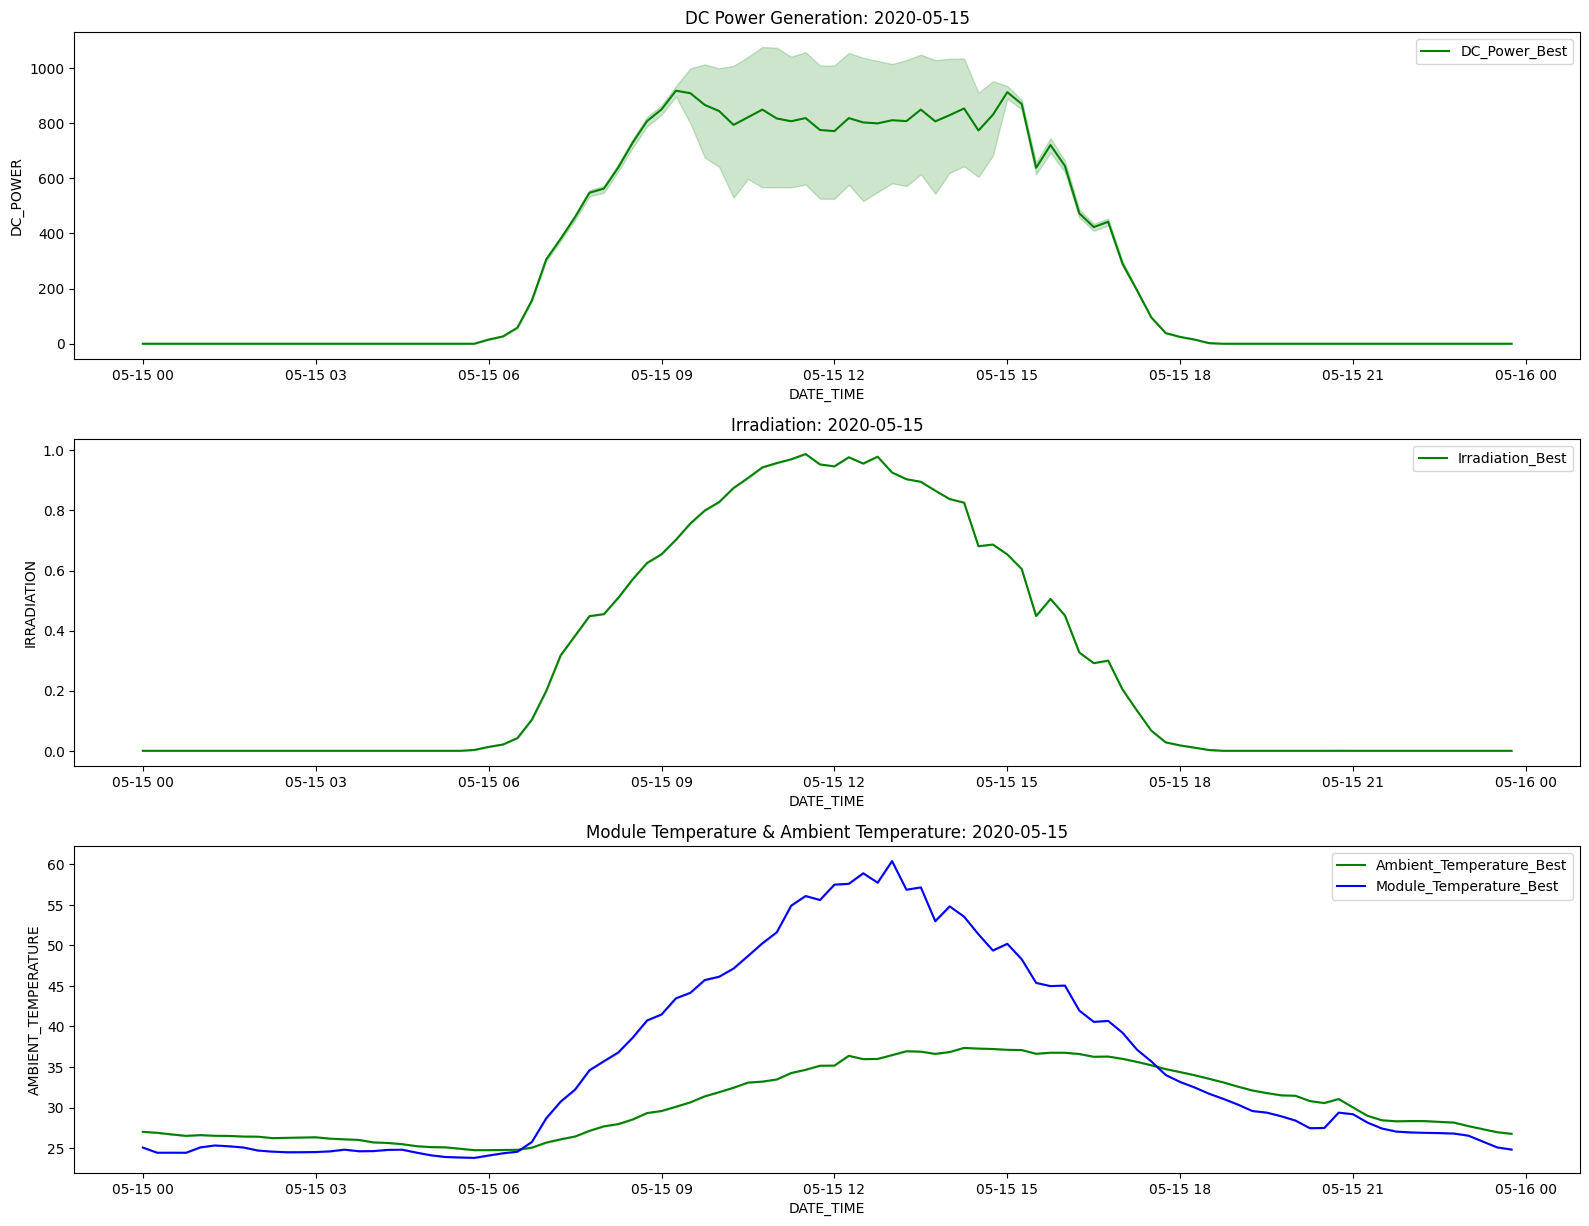

In [56]:
plt.figure(figsize=(16,16))

date = "2020-05-15"

plt.subplot(411)
sns.lineplot(x="DATE_TIME", y="DC_POWER", data=df_solar_plant2[df_solar_plant2["DATE_STRING"] == date], label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date))

plt.subplot(412)
sns.lineplot(x="DATE_TIME", y="IRRADIATION", data=df_solar_plant2[df_solar_plant2["DATE_STRING"] == date], label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date))

plt.subplot(413)
sns.lineplot(x="DATE_TIME", y="AMBIENT_TEMPERATURE", data=df_solar_plant2[df_solar_plant2["DATE_STRING"] == date], label="Ambient_Temperature_Best", color='green')
sns.lineplot(x="DATE_TIME", y="MODULE_TEMPERATURE", data=df_solar_plant2[df_solar_plant2["DATE_STRING"] == date], label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date))

plt.tight_layout()
plt.show()



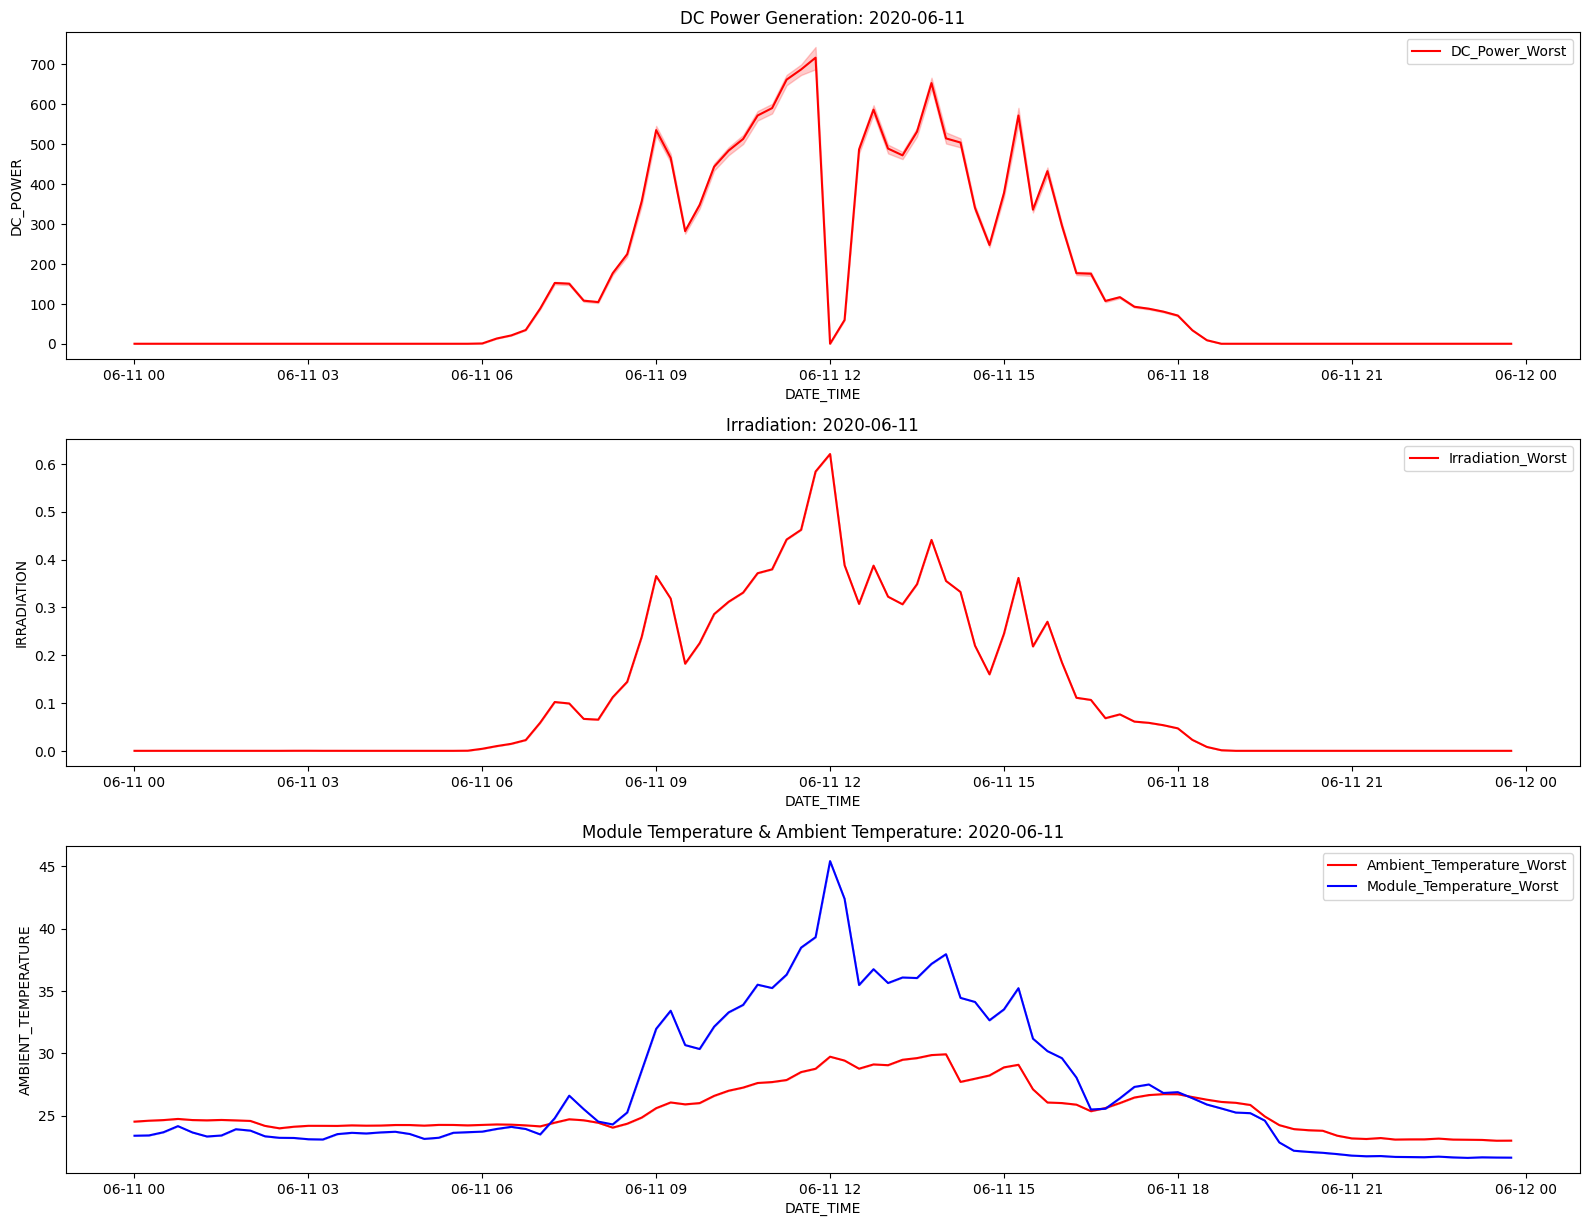

In [58]:
date = "2020-06-11"
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(x="DATE_TIME", y="DC_POWER", data=df_solar_plant2[df_solar_plant2["DATE_STRING"] == date], label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date))

plt.subplot(412)
sns.lineplot(x="DATE_TIME", y="IRRADIATION", data=df_solar_plant2[df_solar_plant2["DATE_STRING"] == date], label="Irradiation_Worst", color='red')
plt.title("Irradiation: {}".format(date))

plt.subplot(413)
sns.lineplot(x="DATE_TIME", y="AMBIENT_TEMPERATURE", data=df_solar_plant2[df_solar_plant2["DATE_STRING"] == date], label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x="DATE_TIME", y="MODULE_TEMPERATURE", data=df_solar_plant2[df_solar_plant2["DATE_STRING"] == date], label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date))

plt.tight_layout()
plt.show()



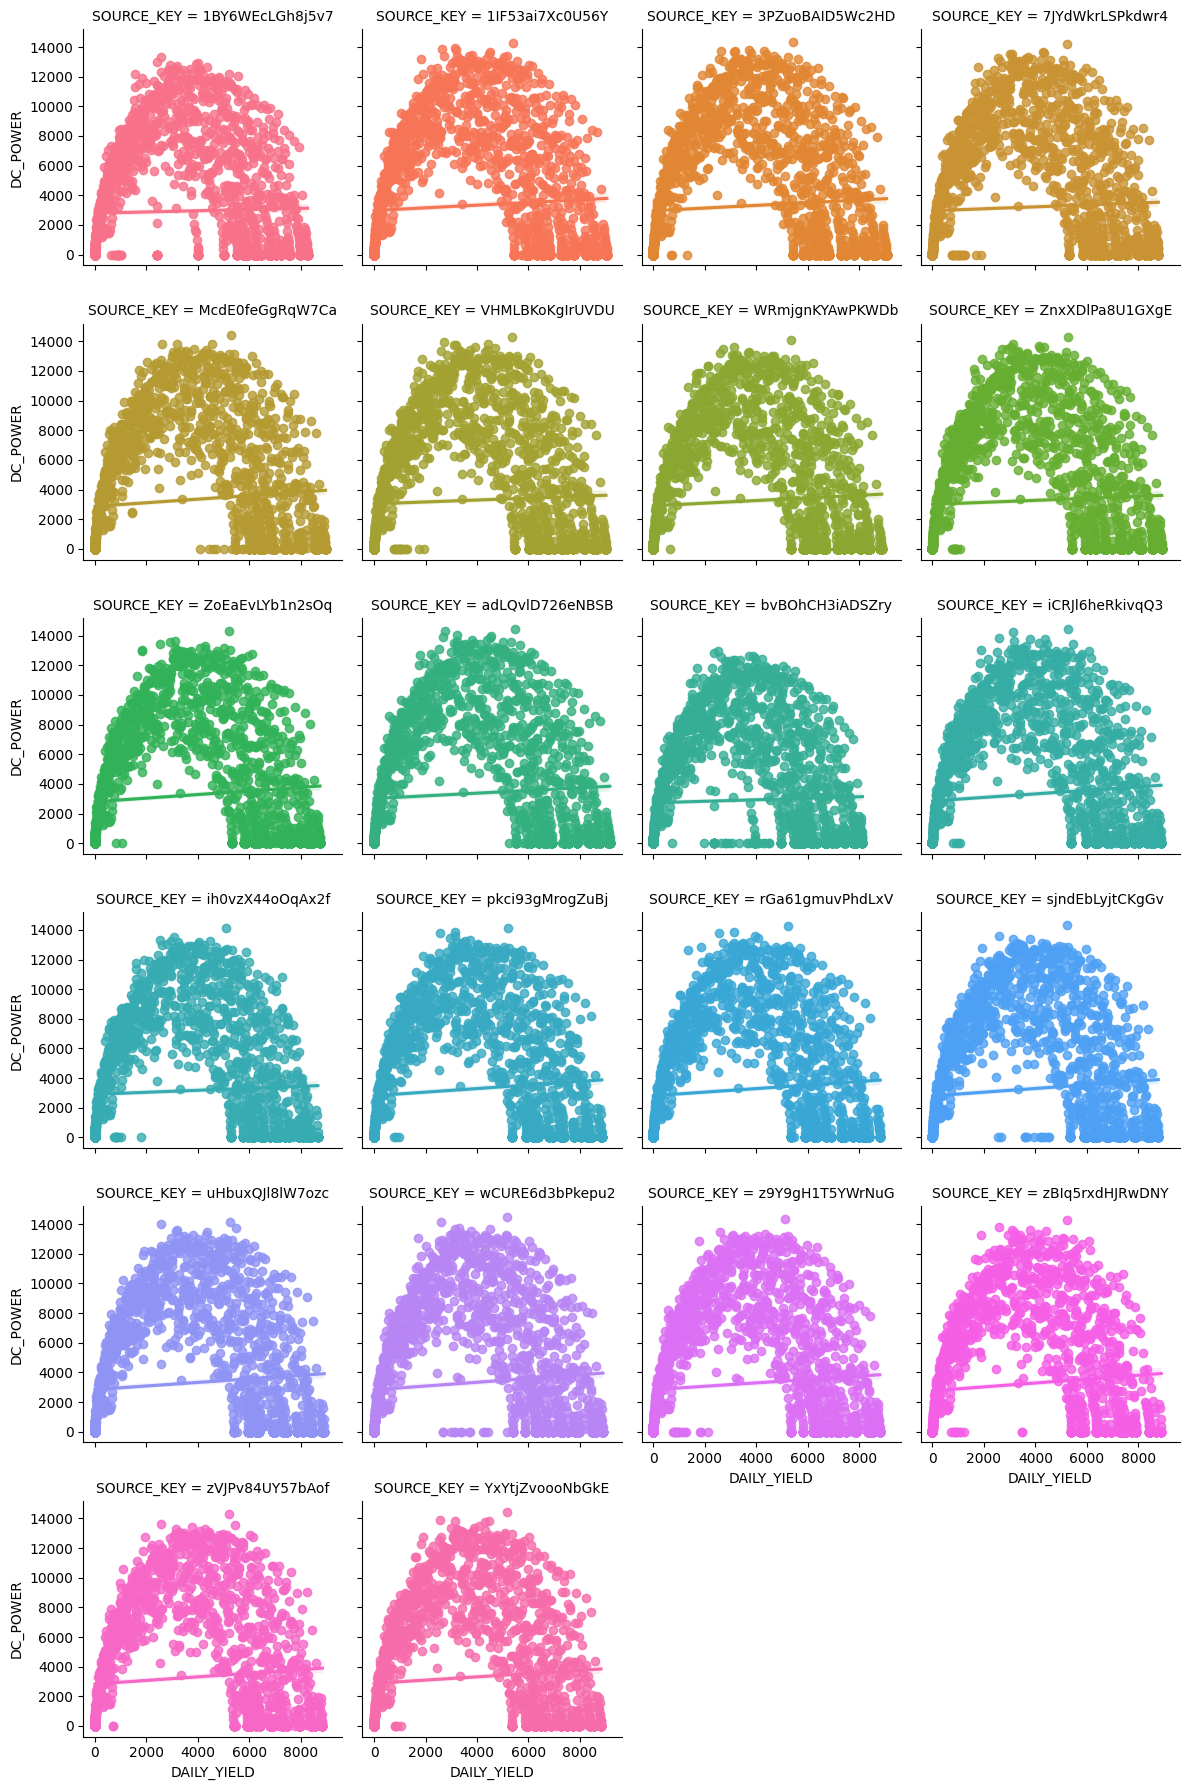

In [59]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar_plant1,fit_reg=True);

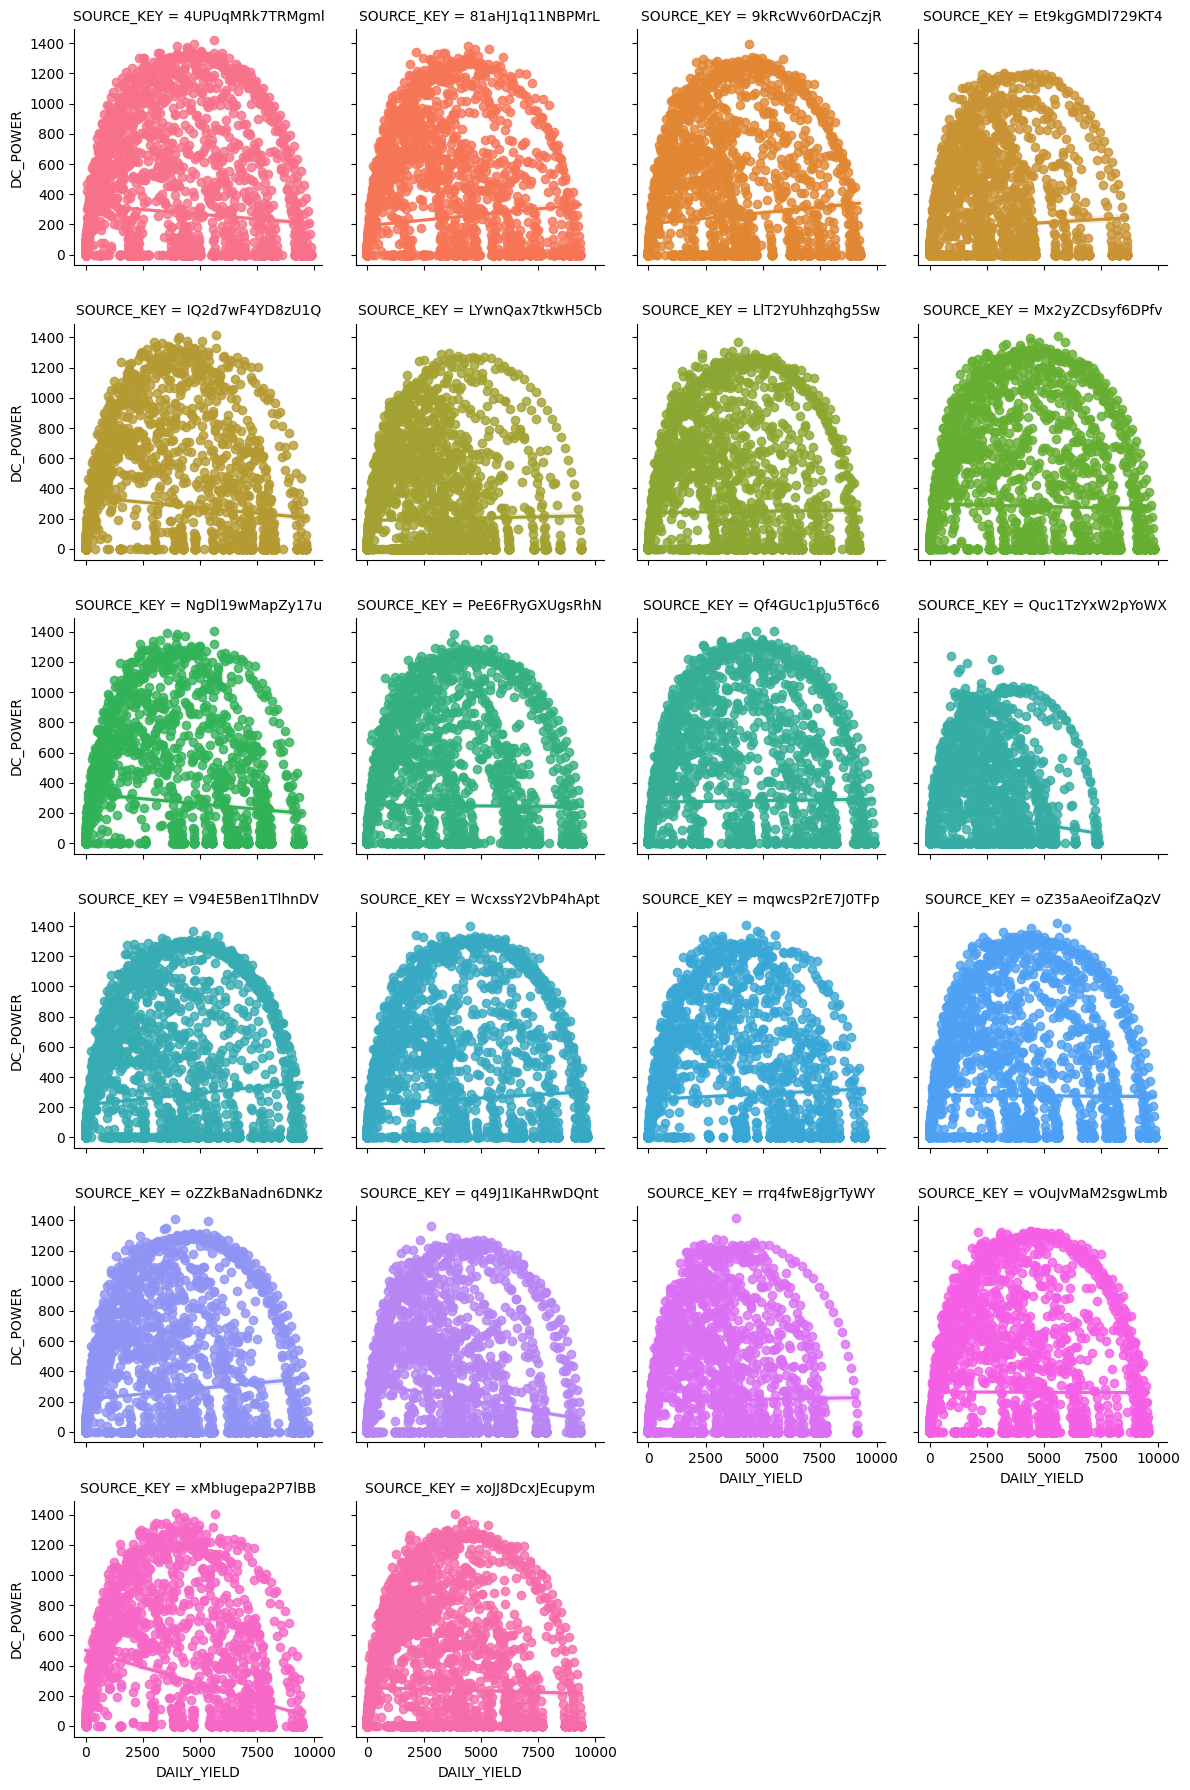

In [60]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar_plant2,fit_reg=True);

In [66]:
solar_dc_power_1 = df_solar_plant1[df_solar_plant1['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power_1 = df_solar_plant1[df_solar_plant1['AC_POWER'] > 0]['AC_POWER'].values

solar_plant_eff = (np.max(solar_ac_power_1)/np.max(solar_dc_power_1 ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant 001:  {solar_plant_eff:0.3f} %")


Power ratio AC/DC (Efficiency) of Solar Power Plant 001:  9.750 %


In [70]:
np.max(solar_dc_power_1)

14471.125

In [67]:
np.max(solar_ac_power_1)

1410.95

In [65]:
solar_dc_power_2 = df_solar_plant2[df_solar_plant2['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power_2 = df_solar_plant2[df_solar_plant2['AC_POWER'] > 0]['AC_POWER'].values

solar_plant_eff = (np.max(solar_ac_power_2)/np.max(solar_dc_power_2 ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant 002:  {solar_plant_eff:0.3f} %")


Power ratio AC/DC (Efficiency) of Solar Power Plant 002:  97.501 %


In [81]:
AC_list_1=[]
for i in df_solar_plant1['AC_POWER']:
    if i>0:
        AC_list_1.append(i)
AC_list_1
#AC_list.sort()
#AC_list.reverse()
len(AC_list_1)

24620

In [78]:
AC_list_2=[]
for i in df_solar_plant2['AC_POWER']:
    if i>0:
        AC_list_2.append(i)
AC_list_2
#AC_list.sort()
#AC_list.reverse()
len(AC_list_2)

32036

In [76]:
#Here we take all nonzero DC values and plot them on histogram
DC_list_1=[]
for i in df_solar_plant1['DC_POWER']:
    if i>0:
        DC_list_1.append(i)
DC_list_1
DC_list_1.sort()
DC_list_1.reverse()
len(DC_list_1)

24620

In [79]:
#Here we take all nonzero DC values and plot them on histogram
DC_list_2=[]
for i in df_solar_plant2['DC_POWER']:
    if i>0:
        DC_list_2.append(i)
DC_list_2
DC_list_2.sort()
DC_list_2.reverse()
len(DC_list_2)

32036

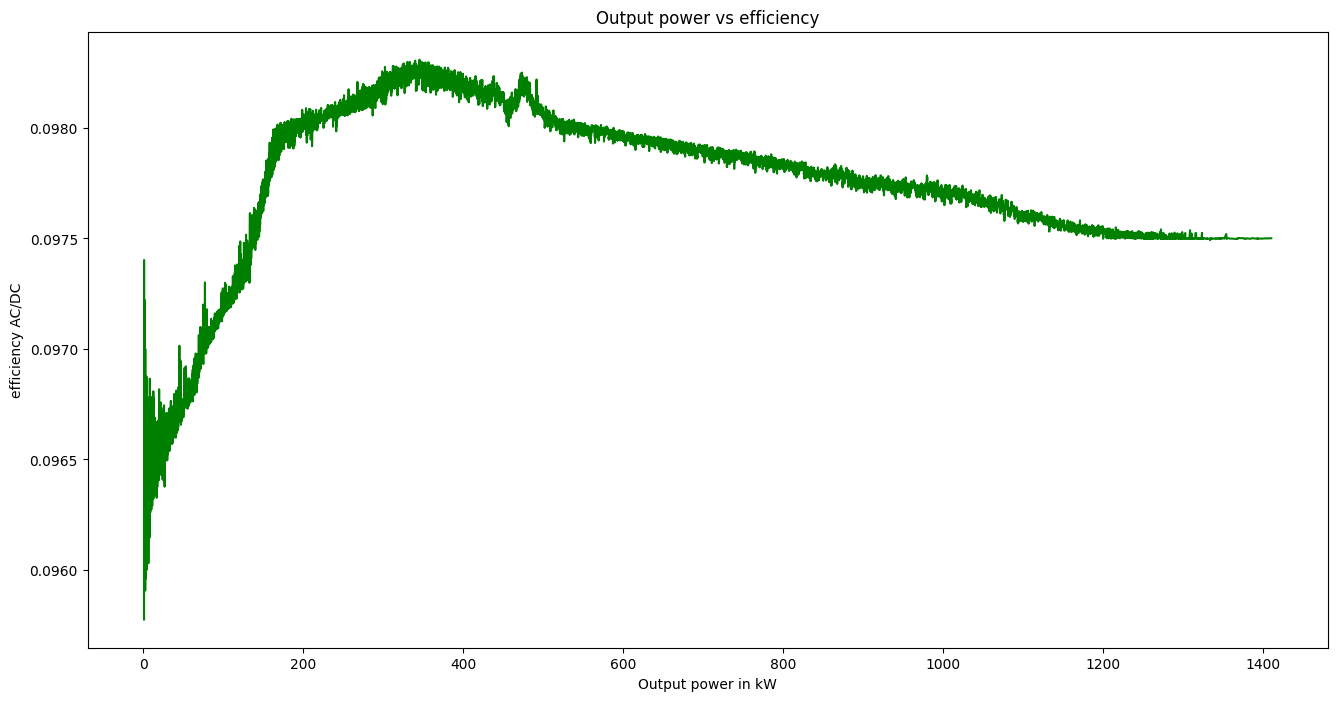

In [82]:
plt.figure(figsize=(16,8))
AC_list_1.sort()
DC_list_1.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list_1,DC_list_1)]

plt.plot(AC_list_1,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

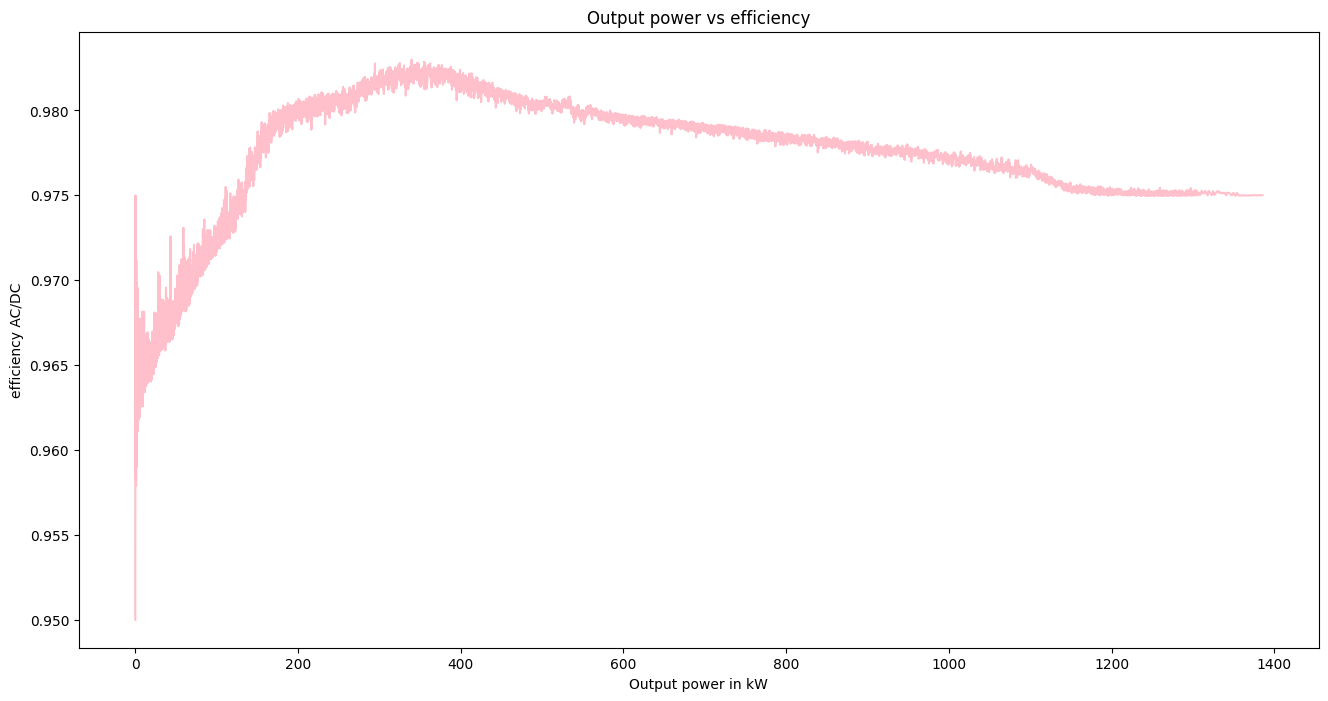

In [83]:
plt.figure(figsize=(16,8))
AC_list_2.sort()
DC_list_2.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list_2,DC_list_2)]

plt.plot(AC_list_2,eff,color='pink')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

Plant 001 data set Train and analytics

In [85]:
df2 = df_solar_plant1.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [86]:
X.head()

DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0          0.0    6259559.0            25.184316           22.857507   
1          0.0    6183645.0            25.184316           22.857507   
2          0.0    6987759.0            25.184316           22.857507   
3          0.0    7602960.0            25.184316           22.857507   
4          0.0    7158964.0            25.184316           22.857507   

   IRRADIATION  DC_POWER  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0

In [87]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


In [93]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


In [94]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


In [95]:
prediction = rfr.predict(X_test)
print(prediction)

[  0.         186.22901785 970.42223214 ...   0.           0.
 363.05001786]


In [96]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

Actual   Predicted
39704    0.000000    0.000000
16578  186.325000  186.229018
38467  971.014286  970.422232
19471    0.000000    0.000000
21836    0.000000    0.000000

In [97]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

Actual   Predicted     Error
39704    0.000000    0.000000  0.000000
16578  186.325000  186.229018  0.095982
38467  971.014286  970.422232  0.592054
19471    0.000000    0.000000  0.000000
21836    0.000000    0.000000  0.000000

In [98]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Plant 002 Data set Analyse 

In [99]:
df3 = df_solar_plant2.copy()
A = df3[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
B = df3['AC_POWER']

In [100]:
A.head()

DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  9425.000000  2.429011e+06            27.004764           25.060789   
1     0.000000  1.215279e+09            27.004764           25.060789   
2  3075.333333  2.247720e+09            27.004764           25.060789   
3   269.933333  1.704250e+06            27.004764           25.060789   
4  3177.000000  1.994153e+07            27.004764           25.060789   

   IRRADIATION  DC_POWER  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0

In [101]:
B.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=.2,random_state=21)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(A_train,B_train)
score_lr = 100*lr_clf.score(A_test,B_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(A_train,B_train)
B_pred_lr = lr.predict(A_test)
R2_Score_lr = round(r2_score(B_pred_lr,B_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


In [105]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(A_train,B_train)
B_pred_rfr = lr.predict(A_test)
R2_Score_rfr = round(r2_score(B_pred_rfr,B_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


In [106]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(A_train,B_train)

B_pred_dtr = lr.predict(A_test)
R2_Score_dtr = round(r2_score(B_pred_dtr,B_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


In [107]:
prediction = rfr.predict(A_test)
print(prediction)

[   0.            0.          684.74349524 ...    0.         1007.11516667
    0.        ]


In [108]:
cross_checking2 = pd.DataFrame({'Actual' : B_test , 'Predicted' : prediction})
cross_checking2.head()

Actual   Predicted
40426    0.000000    0.000000
50974    0.000000    0.000000
53919  684.913333  684.743495
2384     0.000000    0.000000
22014    0.000000    0.000000

In [109]:
cross_checking2['Error'] = cross_checking2['Actual'] - cross_checking2['Predicted']
cross_checking2.head()

Actual   Predicted     Error
40426    0.000000    0.000000  0.000000
50974    0.000000    0.000000  0.000000
53919  684.913333  684.743495  0.169838
2384     0.000000    0.000000  0.000000
22014    0.000000    0.000000  0.000000

In [110]:
cross_checking_final  = cross_checking2[cross_checking2['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })